# Working with TTree ROOT Files

In [1]:
# Start Notebook:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime
import sys

# Add the path to sys.path temporarily
script_dir = '/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis'
sys.path.append(script_dir)
from MyCommonAnalysisFunction_richcap import *
from Pion_Test_Fiducial_Cuts_Defs     import *
# Now you can remove the path if you wish
sys.path.remove(script_dir)
del script_dir

import math
import array
import copy

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

print(f"{color.BOLD}\nStarting RG-A SIDIS Analysis\n{color.END}")

# getting current date
datetime_object_full = datetime.now()

startMin_full = datetime_object_full.minute
startHr_full  = datetime_object_full.hour

timeMin_full = "".join(["0", str(datetime_object_full.minute)]) if(datetime_object_full.minute < 10) else str(datetime_object_full.minute)

Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", str(timeMin_full), " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour),      ":", str(timeMin_full), " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour),      ":", str(timeMin_full), " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD,                                    "12:", str(timeMin_full), " a.m.", color.END]))
print("")


Starting RG-A SIDIS Analysis


Started running on 9-25-2024 at 7:52 p.m.



.

.

.

# Load RDataFrames

In [2]:
# Load ROOT Files:
def FileLocation(FileName, Datatype):
    location = "/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/TTree_Files_ROOT/"
    # location = "TTree_Files_ROOT/"
    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/DataFrame_SIDIS_epip_Data_REC_",         str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/DataFrame_SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/DataFrame_SIDIS_epip_MC_GEN_",              str(FileName), ".root"])
    loading  = "".join([location, file])
    return loading

def FileLocation_Load(FileName, Datatype):
    df = ROOT.RDataFrame("h22", str(FileLocation(str(FileName), str(Datatype))))
    return df

################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################

# Smearing_Options = "no_smear"

Common_Name = "Pass_2_New_TTree_V1_*"


# # Cut_Configuration_Name = "_FC_11" # After Valerii's Cuts - Before my Cuts
# # Cut_Configuration_Name = "_FC_12" # After Valerii's Cuts and my new electron DC refinements - Before my π+ DC Cuts
# Cut_Configuration_Name = ""
# # Cut_Configuration_Name = "_FC7" # Before Valerii's Cuts
# Common_Name = f"Pass_2_New_Fiducial_Cut_Test{Cut_Configuration_Name}_V9_All"

Standard_Histogram_Title_Addition = ""

Pass_Version = "Pass 2" if("Pass_2" in Common_Name) else "Pass 1"
if(Pass_Version not in [""]):
    if(Standard_Histogram_Title_Addition not in [""]):
        Standard_Histogram_Title_Addition = f"{Pass_Version} - {Standard_Histogram_Title_Addition}"
    else:
        Standard_Histogram_Title_Addition = Pass_Version


print(f"{color.BBLUE}\nRunning with {Pass_Version} files\n\n{color.END}")
        
        
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
if(False):
    REAL_File_Name = Common_Name
else:
    REAL_File_Name = "Pass_2_5D_Unfold_Test_V7_All" if(Pass_Version in ["Pass 2"]) else "5D_Unfold_Test_V7_All"
    REAL_File_Name = "Pass_2_New_TTree_V1_5164"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
if(False):
    MC_REC_File_Name = Common_Name
else:
    # MC_REC_File_Name = f"Unsmeared_{Common_Name}" if(Smearing_Options in ["no_smear"]) else Common_Name
    # if(Pass_Version not in ["Pass 2"]):
    #     MC_REC_File_Name = MC_REC_File_Name.replace("Pass_2_", "")
    MC_REC_File_Name = "Pass_2_New_TTree_V1_7901_4"
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
# if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Gen_Cuts_V2_Fixed_All"
    MC_GEN_File_Name = "Pass_2_New_Sector_Cut_Test_V9_All"
####################################
##   Generated Monte Carlo Data   ##
####################################


################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = FileLocation_Load(str(REAL_File_Name), "rdf")
    print("".join(["The (current) total number of columns available for the", color.BLUE,  " Real (Experimental) Data",       color.END, " in       '", color.BOLD, REAL_File_Name,   color.END, "' is ", color.BOLD, str(len(rdf.GetColumnNames())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    mdf = FileLocation_Load(str(MC_REC_File_Name), "mdf")
    print("".join(["The (current) total number of columns available for the", color.RED,   " Reconstructed Monte Carlo Data", color.END, " in '",       color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetColumnNames())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
# try:
#     gdf = FileLocation_Load(str(MC_GEN_File_Name), "gdf")
#     print("".join(["The (current) total number of columns available for the", color.GREEN, " Generated Monte Carlo Data",     color.END, " in     '",   color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetColumnNames())), color.END]))
# except:
#     print("".join([color.Error, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print(f"{color.BOLD}\nPass Version in use is:{color.END}{color.BLUE} {Pass_Version}{color.END_B}\n\n\nDone Loading TTree files...\n\n{color.END}")


Running with Pass 2 files



Not using the common file name for the Real (Experimental) Data...


Not using the common file name for the Reconstructed Monte Carlo Data...

The (current) total number of columns available for the Real (Experimental) Data in       'Pass_2_New_TTree_V1_5164' is 93
The (current) total number of columns available for the Reconstructed Monte Carlo Data in 'Pass_2_New_TTree_V1_7901_4' is 167

Pass Version in use is: Pass 2


Done Loading TTree files...




.

.

## Check Columns of RDataFrames

In [3]:
# Run Checks:
if(not True):
    # Check 'rdf':
    if(True and ("class cppyy.gbl.ROOT.RDataFrame" in str(type(rdf)))):
        print(f"For {color.BOLD}'rdf'{color.END}:")
        for num, ii in enumerate(rdf.GetColumnNames()):
            print(f"\tColumn {str(num+1).rjust(3)}) {color.BOLD}{str(ii).ljust(40)}{color.END}")
            # print(f"\tColumn {str(num+1).rjust(3)}) {str(ii).ljust(35)} | (type -> {type(ii)})")
    elif("class cppyy.gbl.ROOT.RDataFrame" not in str(type(rdf))):
        print(f"\n{color.Error}ERROR: 'rdf' is NOT an RDataFrame\n{color.END}")
    
    print("\n")
    
    # Check 'mdf':
    if(True and ("class cppyy.gbl.ROOT.RDataFrame" in str(type(mdf)))):
        print(f"For {color.BOLD}'mdf'{color.END}:")
        for num, ii in enumerate(mdf.GetColumnNames()):
            print(f"\tColumn {str(num+1).rjust(3)}) {color.BOLD}{str(ii).ljust(40)}{color.END}")
    elif("class cppyy.gbl.ROOT.RDataFrame" not in str(type(mdf))):
        print(f"\n{color.Error}ERROR: 'mdf' is NOT an RDataFrame\n{color.END}")
    
    print("\n")
    
    # # Check 'gdf':
    # if(True and ("class cppyy.gbl.ROOT.RDataFrame" in str(type(gdf)))):
    #     print(f"For {color.BOLD}'gdf'{color.END}:")
    #     for num, ii in enumerate(gdf.GetColumnNames()):
    #         print(f"\tColumn {str(num+1).rjust(3)}) {color.BOLD}{str(ii).ljust(40)}{color.END}")
    # elif("class cppyy.gbl.ROOT.RDataFrame" not in str(type(gdf))):
    #     print(f"\n{color.Error}ERROR: 'gdf' is NOT an RDataFrame\n{color.END}")
    
    print("\n\nDone\n\n")
else:
    print(f"\n{color.BOLD}Not currently running this cell\n{color.END}")


Not currently running this cell



.

.

.

# Creating Histograms

.

.

.

# For Fiducial Cuts (Tests):

In [4]:
# if(True):
#     ROOT.gStyle.SetTitleOffset(1.5,'y')
#     # ROOT.gStyle.SetTitleOffset(-1.5)
#     ROOT.gStyle.SetTitleOffset(1.2,'x')
#     def Ratio_of_2D_Histos(out_hist, rdf_hist, mdf_hist):
#         for x_bin in range(0,      out_hist.GetNbinsX() + 1):
#             for y_bin in range(0,  out_hist.GetNbinsY() + 1):
#                 Histo_rdf_value  = rdf_hist.GetBinContent(x_bin, y_bin)
#                 Histo_mdf_value  = mdf_hist.GetBinContent(x_bin, y_bin)
#                 # Histo_rdf_value  = round(Histo_rdf_value, 10)
#                 # Histo_mdf_value  = round(Histo_mdf_value, 10)
#                 if(Histo_rdf_value == 0):
#                     percent_diff = 10000 if(Histo_mdf_value != 0) else 0
#                 else:
#                     percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
#                 if(percent_diff   < 20):
#                     percent_diff  = 0
#                 out_hist.SetBinContent(x_bin, y_bin, percent_diff)
#         return out_hist

#     def Normalize_Histogram(histogram):
#         integral = histogram.Integral()
#         # Check if the integral is non-zero to avoid division by zero
#         if(integral != 0):
#             # histogram.Scale(1.0 / integral)
#             histogram.Scale(100 / integral)
#         return histogram

#     def is_point_in_polygon(x, y, polygon):
#         def angle(x1, y1, x2, y2):
#             return math.atan2(y2 - y1, x2 - x1)
#         winding_number = 0
#         num_vertices = len(polygon)
#         for i in range(num_vertices):
#             x1, y1 = polygon[i]
#             x2, y2 = polygon[(i + 1) % num_vertices]
#             a1 = angle(x, y, x1, y1)
#             a2 = angle(x, y, x2, y2)
#             angle_diff = a2 - a1
#             if(angle_diff > math.pi):
#                 angle_diff -= 2 * math.pi
#             elif(angle_diff < -math.pi):
#                 angle_diff += 2 * math.pi
#             winding_number += angle_diff
#         return abs(winding_number) > math.pi

#     def apply_cut_on_boxes_3D(histogram, box_borders):
#         for binz in range(0, histogram.GetNbinsZ() + 2):
#             for biny in range(0, histogram.GetNbinsY() + 2):
#                 DCy = histogram.GetZaxis().GetBinCenter(binz)
#                 DCx = histogram.GetYaxis().GetBinCenter(biny)
#                 # Perform the cut check based only on DCx and DCy
#                 if(not (any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders))):
#                 # if((any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders))):
#                     for binx in range(0, histogram.GetNbinsX() + 2):
#                         # angle = histogram.GetXaxis().GetBinCenter(binx)
#                         histogram.SetBinContent(binx, biny, binz, 0)  # Set bin content to zero
#         return histogram

#     def set_common_yaxis_range(hist1, hist2, hist3="N/A", hist4="N/A"):
#         # Initialize variables for global min and max
#         global_min = float('inf')
#         global_max = float('-inf')
#         # Loop over the bins of the first histogram
#         for bin_ii in range(1, hist1.GetNbinsX() + 1):
#             content = hist1.GetBinContent(bin_ii)
#             error   = hist1.GetBinError(bin_ii)
#             # Update global min/max with content ± error
#             global_min = min(global_min, content - error)
#             global_max = max(global_max, content + error)
#         # Loop over the bins of the second histogram
#         for bin_ii in range(1, hist2.GetNbinsX() + 1):
#             content = hist2.GetBinContent(bin_ii)
#             error   = hist2.GetBinError(bin_ii)
#             # Update global min/max with content ± error
#             global_min = min(global_min, content - error)
#             global_max = max(global_max, content + error)
#         if(hist3 not in ["N/A"]):
#             for bin_ii in range(1, hist3.GetNbinsX() + 1):
#                 content = hist3.GetBinContent(bin_ii)
#                 error   = hist3.GetBinError(bin_ii)
#                 # Update global min/max with content ± error
#                 global_min = min(global_min, content - error)
#                 global_max = max(global_max, content + error)
#         if(hist4 not in ["N/A"]):
#             for bin_ii in range(1, hist4.GetNbinsX() + 1):
#                 content = hist4.GetBinContent(bin_ii)
#                 error   = hist4.GetBinError(bin_ii)
#                 # Update global min/max with content ± error
#                 global_min = min(global_min, content - error)
#                 global_max = max(global_max, content + error)
#         global_min = 1.2*global_min if(global_min < 0) else 0.8*global_min
#         global_max = 1.5*global_max if(global_max > 0) else 0.8*global_max

#         # Set the y-axis range for both histograms to the common range
#         hist1.GetYaxis().SetRangeUser(global_min, global_max)
#         hist2.GetYaxis().SetRangeUser(global_min, global_max)
#         if(hist3 not in ["N/A"]):
#             hist3.GetYaxis().SetRangeUser(global_min, global_max)
#         if(hist4 not in ["N/A"]):
#             hist4.GetYaxis().SetRangeUser(global_min, global_max)

#     canvas, histograms, pl = {}, {}, {}
#     ROOT.gStyle.SetOptStat("i")


#     polygon = {}

#     Particle = "pip"
#     Particle_Title = "#pi^{+} Pion" if(Particle in ["pip"]) else "Electron"
#     DC_Layer = 6

#     Search_Include = ["(Histo-Group='Normal_3D')", "(Data-Cut='cut_Complete_SIDIS')", "(Smear-Type='')"]

#     # Search_Include.append("Var-D1='ele_x_DC")
#     # Search_Include.append("ele_x_DC_18_rot")
#     Search_Include.append(f"Var-D1='{Particle}_x_DC")
#     Search_Include.append(f"{Particle}_x_DC_{DC_Layer}")
#     # Search_Include.append(f"{Particle}_x_DC_{DC_Layer}_rot")

#     particle_angle = "pipPhi"
#     # particle_angle = "pipth"
#     particle_angle_Title = "".join(["#phi" if("Phi" in particle_angle) else "#theta", "_{", "#pi^{+} Pion" if("pip" in particle_angle) else "Electron", "}"])
#     Search_Include.append(particle_angle)
#     # Search_Include.append("pipth")

#     Search_Exclude = ["(Data-Cut='no_cut')"]
#     Search_Exclude.append("elPhi")
#     Search_Exclude.append("elth")

#     Search_Exclude.append("_rot")


#     Rotation_Conditions = ("_rot" not in Search_Exclude)
#     Rotation_Conditions = False

#     Sector = "All"
#     # Sector = 3
#     if(Rotation_Conditions):
#         x_axis_DC_min, x_axis_DC_max         = -200, 200
#         y_axis_DC_min, y_axis_DC_max         = -100 - (50*int((DC_Layer/6)/3)), 100 + (50*int((DC_Layer/6)/3))
#     else:
#         if(DC_Layer in [6]):
#             x_axis_DC_min, x_axis_DC_max     = -150, 150
#             y_axis_DC_min, y_axis_DC_max     = -175, 175
#             if(Sector == 1):
#                 x_axis_DC_min, x_axis_DC_max =    0, 150
#                 y_axis_DC_min, y_axis_DC_max = -100, 100
#             if(Sector == 2):
#                 x_axis_DC_min, x_axis_DC_max = -50,  150
#                 y_axis_DC_min, y_axis_DC_max =   0,  150
#             if(Sector == 3):
#                 x_axis_DC_min, x_axis_DC_max = -150,  50
#                 y_axis_DC_min, y_axis_DC_max =    0, 150
#             if(Sector == 4):
#                 x_axis_DC_min, x_axis_DC_max = -150,   0
#                 y_axis_DC_min, y_axis_DC_max = -100, 100
#             if(Sector == 5):
#                 x_axis_DC_min, x_axis_DC_max = -150,  50
#                 y_axis_DC_min, y_axis_DC_max = -160,   0
#             if(Sector == 6):
#                 x_axis_DC_min, x_axis_DC_max =  -50, 150
#                 y_axis_DC_min, y_axis_DC_max = -150,   0
#         # if(DC_Layer in [18]):
#         #     h1[SECTOR].GetXaxis().SetRangeUser(-225, 225)
#         #     h1[SECTOR].GetYaxis().SetRangeUser(-250, 300)
#             # h1[SECTOR].GetXaxis().SetRangeUser(-5, 225)
#             # h1[SECTOR].GetYaxis().SetRangeUser(-300, 5)
#             # h1[SECTOR].GetYaxis().SetRangeUser(-100, 100)
#         if(DC_Layer in [18]):
#             x_axis_DC_min, x_axis_DC_max     = -300, 300
#             y_axis_DC_min, y_axis_DC_max     = -300, 300
#             if(Sector in [1]):
#                 x_axis_DC_min, x_axis_DC_max = -5,   300
#                 y_axis_DC_min, y_axis_DC_max = -200, 200
#             if(Sector in [2]):
#                 x_axis_DC_min, x_axis_DC_max = -5,   300
#                 y_axis_DC_min, y_axis_DC_max = -5,   300
#             if(Sector in [3]):
#                 x_axis_DC_min, x_axis_DC_max = -300,   5
#                 y_axis_DC_min, y_axis_DC_max = -5,   300
#             if(Sector in [4]):
#                 x_axis_DC_min, x_axis_DC_max = -300,   5
#                 y_axis_DC_min, y_axis_DC_max = -200, 200
#             if(Sector in [5]):
#                 x_axis_DC_min, x_axis_DC_max = -300,   5
#                 y_axis_DC_min, y_axis_DC_max = -300,   5
#             if(Sector in [6]):
#                 x_axis_DC_min, x_axis_DC_max = -5,   275
#                 y_axis_DC_min, y_axis_DC_max = -250,   5
#         if(DC_Layer in [36]):
#             x_axis_DC_min, x_axis_DC_max     = -500, 500
#             y_axis_DC_min, y_axis_DC_max     = -500, 500
#             if(Sector in [1]):
#                 x_axis_DC_min, x_axis_DC_max = -5,   500
#                 y_axis_DC_min, y_axis_DC_max = -200, 200
#             if(Sector in [2]):
#                 x_axis_DC_min, x_axis_DC_max = -5,   500
#                 y_axis_DC_min, y_axis_DC_max = -5,   500
#             if(Sector in [3]):
#                 x_axis_DC_min, x_axis_DC_max = -500,   5
#                 y_axis_DC_min, y_axis_DC_max = -5,   500
#             if(Sector in [4]):
#                 x_axis_DC_min, x_axis_DC_max = -500,   5
#                 y_axis_DC_min, y_axis_DC_max = -200, 200
#             if(Sector in [5]):
#                 x_axis_DC_min, x_axis_DC_max = -500,   5
#                 y_axis_DC_min, y_axis_DC_max = -500,   5
#             if(Sector in [6]):
#                 x_axis_DC_min, x_axis_DC_max = -5,   500
#                 y_axis_DC_min, y_axis_DC_max = -500,   5

#     quadrilaterals = []
#     if(Rotation_Conditions):
#         quadrilaterals.append(polygon["".join(["Layer_", str(DC_Layer), "_", "" if (DC_Layer not in [6]) else "_", str(Particle)])])
#     else:
#         quadrilaterals = []
#         for sec in range(1 if(str(Sector) in ["All", "0"]) else Sector, 7 if(str(Sector) in ["All", "0"]) else Sector+1, 1):
#             # if(sec in [6]):
#             #     continue
#             quadrilaterals.append(polygon_pip_secs[f"Sector_{sec}"][f"Layer_{DC_Layer}"])
#             print(f"Adding: [Sector_{sec}][Layer_{DC_Layer}]")
#         def apply_cut_on_boxes_3D(histogram, box_borders):
#             for binz in range(0, histogram.GetNbinsZ() + 2):
#                 for biny in range(0, histogram.GetNbinsY() + 2):
#                     DCy = histogram.GetZaxis().GetBinCenter(binz)
#                     DCx = histogram.GetYaxis().GetBinCenter(biny)
#                     # Perform the cut check based only on DCx and DCy
#                     if(any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders)):
#                         for binx in range(0, histogram.GetNbinsX() + 2):
#                             histogram.SetBinContent(binx, biny, binz, 0)  # Set bin content to zero
#             return histogram
        
#         polygon_pip    = {}
#         for DC_Layer_ii in [6, 18, 36]:
#             # polygon_pip["".join(["Layer_",     str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "ele"])] = polygon["".join(["Layer_",           str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "ele"])].copy()
#             polygon_pip["".join(["Layer_",     str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "pip"])] = polygon_pip_secs[f"Sector_{1}"][f"Layer_{DC_Layer_ii}"].copy()
#             for sec in range(2, 7, 1):
#                 polygon_pip["".join(["Layer_", str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "pip"])].append(polygon_pip_secs[f"Sector_{sec}"][f"Layer_{DC_Layer_ii}"])

#     List_of_Cuts = ["Complete_SIDIS_Cuts", "Valerii_DC_Fiducial_Cuts_ele_DC_6", "Valerii_DC_Fiducial_Cuts_ele_DC_18", "Valerii_DC_Fiducial_Cuts_ele_DC_36", "Valerii_OG_Cut", "Valerii_PCal_Fiducial_Cuts", "My_pip_DC_Fiducial_Cuts"]
    
#     rdf_cut = rdf
#     mdf_cut = mdf
#     for cut in List_of_Cuts:
#         rdf_cut = rdf_cut.Filter(cut)
#         mdf_cut = mdf_cut.Filter(cut)


#     histo_name_rdf = f"RDF_{Particle}_DC_Layer_{DC_Layer}_Main"
#     histo_name_mdf = f"MDF_{Particle}_DC_Layer_{DC_Layer}_Main"
    
#     histograms[f"{histo_name_rdf}____Drift_Chamber"] = rdf_cut.Histo2D((f"{histo_name_rdf}____Drift_Chamber", "rdf (DC) Title", 800, -400, 400, 800, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
#     histograms[f"{histo_name_mdf}____Drift_Chamber"] = mdf_cut.Histo2D((f"{histo_name_mdf}____Drift_Chamber", "mdf (DC) Title", 800, -400, 400, 800, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
#     histograms[f"{histo_name_rdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     histograms[f"{histo_name_rdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     histograms[f"{histo_name_mdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     histograms[f"{histo_name_mdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    
#     histograms[f"{histo_name_rdf}_{particle_angle}"] = rdf_cut.Histo1D((f"{histo_name_rdf}_{particle_angle}", "rdf (angle) Title", 720, 0, 360), str(particle_angle))
#     histograms[f"{histo_name_rdf}_{particle_angle}"].SetLineColor(ROOT.kBlue)
#     histograms[f"{histo_name_mdf}_{particle_angle}"] = mdf_cut.Histo1D((f"{histo_name_mdf}_{particle_angle}", "mdf (angle) Title", 720, 0, 360), str(particle_angle))
#     histograms[f"{histo_name_mdf}_{particle_angle}"].SetLineColor(ROOT.kRed)

#     Normalize_Histogram(histograms[f"{histo_name_rdf}____Drift_Chamber"])
#     Normalize_Histogram(histograms[f"{histo_name_rdf}_{particle_angle}"])
#     Normalize_Histogram(histograms[f"{histo_name_mdf}____Drift_Chamber"])
#     Normalize_Histogram(histograms[f"{histo_name_mdf}_{particle_angle}"])

#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = histograms[f"{histo_name_rdf}____Drift_Chamber"].Clone(f"{histo_name_rdf}____Drift_Chamber_ratio")
#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = Ratio_of_2D_Histos(out_hist=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"], rdf_hist=histograms[f"{histo_name_rdf}____Drift_Chamber"], mdf_hist=histograms[f"{histo_name_mdf}____Drift_Chamber"])

#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"] = histograms[f"{histo_name_rdf}_{particle_angle}"].Clone(f"{histo_name_rdf}_{particle_angle}_ratio")
#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Add(histograms[f"{histo_name_mdf}_{particle_angle}"], -1)
#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Divide(histograms[f"{histo_name_rdf}_{particle_angle}"])


#     canvas[histo_name_rdf] = Canvas_Create(Name=f"canvas_{histo_name_rdf}", Num_Columns=1, Num_Rows=3, Size_X=2200, Size_Y=1800, cd_Space=0)
#     canvas[histo_name_rdf].SetFillColor(17)  # Color index 17 corresponds to a light grey color

#     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"] = canvas[histo_name_rdf].cd(1)
#     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"] = canvas[histo_name_rdf].cd(2)
#     canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"] = canvas[histo_name_rdf].cd(3)

#     Plot_All_Q = not False

#     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].SetPad(0.05, 0.545, 0.95, 0.95)
#     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].SetPad(0.05, 0.05,  0.95, 0.555)
#     canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"].SetPad(0.78 if(Plot_All_Q) else 0.71, 0.3, 0.9, 0.8)

#     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)
#     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)

#     # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
#     set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_{particle_angle}_ratio"])
#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetLineColor(ROOT.kBlack)
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetLineColor(ROOT.kGreen)

#     # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
#     set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_{particle_angle}_ratio"])
#     # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"], histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"])
#     set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"], histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"])

#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{Before Applying the (New) DC Fiducial Cuts}}}}")
#     # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{After Applying the (New) DC Fiducial Cuts}}}}")

#     histograms[f"{histo_name_rdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
#     histograms[f"{histo_name_mdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")

#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
#     # histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")

#     histograms[f"{histo_name_rdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
#     histograms[f"{histo_name_mdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")
#     # histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")

#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")

#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")

#     if(Plot_All_Q):
#         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(1)
#         histograms[f"{histo_name_rdf}____Drift_Chamber"].Draw("colz")
#         ROOT.gPad.SetLogz(0)
#         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(2)
#         histograms[f"{histo_name_mdf}____Drift_Chamber"].Draw("colz")
#         ROOT.gPad.SetLogz(0)
#     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(3 if(Plot_All_Q) else 1)
#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
#     ROOT.gPad.SetLogz(1)
#     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(4 if(Plot_All_Q) else 2)
#     histograms[f"{histo_name_rdf}_{particle_angle}"].Draw("hist EO same")
#     histograms[f"{histo_name_mdf}_{particle_angle}"].Draw("hist EO same")
#     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(5 if(Plot_All_Q) else 3)
#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")

#     # if(Plot_All_Q):
#     #     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(1)
#     #     histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].Draw("colz")
#     #     ROOT.gPad.SetLogz(0)
#     #     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(2)
#     #     histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].Draw("colz")
#     #     ROOT.gPad.SetLogz(0)
#     # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(3 if(Plot_All_Q) else 1)
#     # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
#     # ROOT.gPad.SetLogz(1)
#     # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(4 if(Plot_All_Q) else 2)
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
#     # histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
#     # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(5 if(Plot_All_Q) else 3)
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")

#     canvas[histo_name_rdf].cd(3)
#     canvas[histo_name_rdf].cd(3).SetTopMargin(0.05)
#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")

#     canvas[histo_name_rdf].Update()

#     CD_NUM_List = [1, 2, 3] if(Plot_All_Q) else [1]
#     for CD_NUM in CD_NUM_List:
#         try:
#             for ii, polygon_ii in enumerate(quadrilaterals):
#                 n_points = len(polygon_ii)
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"] = ROOT.TPolyLine(n_points + 1)
#                 # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"] = ROOT.TPolyLine(n_points + 1)
#                 for i, (x, y) in enumerate(polygon_ii):
#                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(i, x, y)
#                     # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(i, x, y)
#                 # Close the shape by repeating the first point
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineColor(2)  # Red color
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineWidth(1)
#                 # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
#                 # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineColor(2)  # Red color
#                 # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineWidth(1)
#                 canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(CD_NUM)
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].Draw("same")
#                 # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(CD_NUM)
#                 # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].Draw("same")
#             canvas[histo_name_rdf].Update()
#         except:
#             print("ERROR in box.Draw('same')")


#     canvas[histo_name_rdf].Draw()
#     canvas[histo_name_rdf].Update()

#     canvas[f"canvas_{histo_name_rdf}_DC"] = Canvas_Create(Name=f"canvas_{histo_name_rdf}_DC", Num_Columns=2, Num_Rows=1, Size_X=1800, Size_Y=1600, cd_Space=0.01)
#     canvas[f"canvas_{histo_name_rdf}_DC"].SetFillColor(17)  # Color index 17 corresponds to a light grey color

#     canvas[f"canvas_{histo_name_rdf}_DC"].cd(1).SetPad(0.1,   0.1, 0.495, 0.9)
#     canvas[f"canvas_{histo_name_rdf}_DC"].cd(2).SetPad(0.505, 0.1, 0.9,   0.9)

#     canvas[f"canvas_{histo_name_rdf}_DC"].cd(1)
#     # Draw_Canvas(canvas[f"canvas_{histo_name_rdf}_DC"], 1, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1)
#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     ROOT.gPad.SetLogz(1)
#     palette_move(canvas=canvas[f"canvas_{histo_name_rdf}_DC"], histo=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"],           x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#     # canvas[f"canvas_{histo_name_rdf}_DC"].cd(2)
#     # # Draw_Canvas(canvas[f"canvas_{histo_name_rdf}_DC"], 2, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1)
#     # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
#     # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     # palette_move(canvas=canvas[f"canvas_{histo_name_rdf}_DC"], histo=histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#     # for CD_NUM in [1, 2]:
#     for CD_NUM in [1]:
#         try:
#             for ii, polygon_ii in enumerate(quadrilaterals):
#                 n_points = len(polygon_ii)
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"] = ROOT.TPolyLine(n_points + 1)
#                 for i, (x, y) in enumerate(polygon_ii):
#                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetPoint(i, x, y)
#                 # Close the shape by repeating the first point
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetLineColor(2)  # Red color
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetLineWidth(1)
#                 canvas[f"canvas_{histo_name_rdf}_DC"].cd(CD_NUM)
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].Draw("same")
#             canvas[f"canvas_{histo_name_rdf}_DC"].Update()
#         except:
#             print("ERROR in box.Draw('same')")

#     canvas[f"canvas_{histo_name_rdf}_DC"].Draw()
#     canvas[f"canvas_{histo_name_rdf}_DC"].Update()

#     # canvas[histo_name_rdf].Draw()
#     # canvas[histo_name_rdf].Update()
    
    
#     # for key in rdf.GetListOfKeys():
#     #     histo_name_rdf = key.GetName()
#     #     if(all(include in str(histo_name_rdf) for include in Search_Include) and all(exclude not in str(histo_name_rdf) for exclude in Search_Exclude)):
#     #         histo_name_mdf = histo_name_rdf.replace("='rdf'", "='mdf'")
#     #         histo_name_bdf = histo_name_mdf.replace("Normal_3D", "Normal_Background_3D")

#     #         print("\n-------------------------------------------------------\n")
#     #         print(f"histo_name_rdf = {histo_name_rdf}\n{color.BOLD}type = {type(rdf.Get(histo_name_rdf))}{color.END}\n")
#     #         # print(f"histo_name_mdf = {histo_name_mdf}\n")
#     #         # print(f"histo_name_bdf = {histo_name_bdf}\n")

#     #         histograms[histo_name_rdf] = rdf.Get(histo_name_rdf)
#     #         histograms[histo_name_mdf] = mdf.Get(histo_name_mdf)
#     #         # histograms[histo_name_bdf] = mdf.Get(histo_name_bdf)
#     #         histograms[histo_name_mdf].Add(mdf.Get(histo_name_bdf))

#     #         Rebin_DC = 10 if(Rotation_Conditions) else 5
#     #         # if((int((DC_Layer/6)/3) not in [0, 1, 2]) or (Rotation_Conditions)):
#     #         # if(Rotation_Conditions):
#     #         if(Rebin_DC not in [0]):
#     #             histograms[histo_name_rdf].RebinZ(Rebin_DC)
#     #             histograms[histo_name_rdf].RebinY(Rebin_DC)
#     #             histograms[histo_name_mdf].RebinZ(Rebin_DC)
#     #             histograms[histo_name_mdf].RebinY(Rebin_DC)

#     #         # Rebin lab angles
#     #         histograms[histo_name_rdf].RebinX(4)
#     #         histograms[histo_name_mdf].RebinX(4)

#     #         particle_angle_Title = "".join(["#phi" if("#phi" in str(histograms[histo_name_mdf].GetXaxis().GetTitle())) else "#theta", "_{", "#pi^{+} Pion" if("pi" in str(histograms[histo_name_mdf].GetXaxis().GetTitle())) else "Electron", "}"])

#     #         # histograms[histo_name_rdf].GetXaxis().SetRangeUser(240, 320)
#     #         # histograms[histo_name_mdf].GetXaxis().SetRangeUser(240, 320)

#     #         # Normalize_Histogram(histograms[histo_name_rdf])
#     #         # Normalize_Histogram(histograms[histo_name_mdf])

#     #         histograms[f"{histo_name_rdf}_After_Cut"] = histograms[histo_name_rdf].Clone(f"{histo_name_rdf}_After_Cut")
#     #         histograms[f"{histo_name_mdf}_After_Cut"] = histograms[histo_name_mdf].Clone(f"{histo_name_mdf}_After_Cut")

#     #         histograms[f"{histo_name_rdf}_After_Cut"] = apply_cut_on_boxes_3D(histogram=histograms[f"{histo_name_rdf}_After_Cut"], box_borders=quadrilaterals)
#     #         histograms[f"{histo_name_mdf}_After_Cut"] = apply_cut_on_boxes_3D(histogram=histograms[f"{histo_name_mdf}_After_Cut"], box_borders=quadrilaterals)


#     #         histograms[f"{histo_name_rdf}____Drift_Chamber"] = histograms[histo_name_rdf].Project3D("zy")
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     #         histograms[f"{histo_name_rdf}_{particle_angle}"] = histograms[histo_name_rdf].Project3D("x")
#     #         histograms[f"{histo_name_rdf}_{particle_angle}"].SetLineColor(ROOT.kBlue)

#     #         histograms[f"{histo_name_mdf}____Drift_Chamber"] = histograms[histo_name_mdf].Project3D("zy")
#     #         histograms[f"{histo_name_mdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     #         histograms[f"{histo_name_mdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     #         histograms[f"{histo_name_mdf}_{particle_angle}"] = histograms[histo_name_mdf].Project3D("x")
#     #         histograms[f"{histo_name_mdf}_{particle_angle}"].SetLineColor(ROOT.kRed)
            
#     #         Normalize_Histogram(histograms[f"{histo_name_rdf}____Drift_Chamber"])
#     #         Normalize_Histogram(histograms[f"{histo_name_rdf}_{particle_angle}"])
#     #         Normalize_Histogram(histograms[f"{histo_name_mdf}____Drift_Chamber"])
#     #         Normalize_Histogram(histograms[f"{histo_name_mdf}_{particle_angle}"])


#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = histograms[f"{histo_name_rdf}____Drift_Chamber"].Clone(f"{histo_name_rdf}____Drift_Chamber_ratio")
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = Ratio_of_2D_Histos(out_hist=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"], rdf_hist=histograms[f"{histo_name_rdf}____Drift_Chamber"], mdf_hist=histograms[f"{histo_name_mdf}____Drift_Chamber"])

#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"] = histograms[f"{histo_name_rdf}_{particle_angle}"].Clone(f"{histo_name_rdf}_{particle_angle}_ratio")
#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Add(histograms[f"{histo_name_mdf}_{particle_angle}"], -1)
#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Divide(histograms[f"{histo_name_rdf}_{particle_angle}"])




#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"] = histograms[f"{histo_name_rdf}_After_Cut"].Project3D("zy")
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"] = histograms[f"{histo_name_rdf}_After_Cut"].Project3D("x")
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].SetLineColor(ROOT.kBlue)

#     #         histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"] = histograms[f"{histo_name_mdf}_After_Cut"].Project3D("zy")
#     #         histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     #         histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     #         histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"] = histograms[f"{histo_name_mdf}_After_Cut"].Project3D("x")
#     #         histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].SetLineColor(ROOT.kRed)
            
            
#     #         Normalize_Histogram(histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"])
#     #         Normalize_Histogram(histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"])
#     #         Normalize_Histogram(histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"])
#     #         Normalize_Histogram(histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"])

#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"] = histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].Clone(f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio")
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"] = Ratio_of_2D_Histos(out_hist=histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"], rdf_hist=histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"], mdf_hist=histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"])

#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"] = histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].Clone(f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio")
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Add(histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"], -1)
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Divide(histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"])


#     #         canvas[histo_name_rdf] = Canvas_Create(Name=f"canvas_{histo_name_rdf}", Num_Columns=1, Num_Rows=3, Size_X=2200, Size_Y=1800, cd_Space=0)
#     #         canvas[histo_name_rdf].SetFillColor(17)  # Color index 17 corresponds to a light grey color

#     #         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"] = canvas[histo_name_rdf].cd(1)
#     #         canvas[f"{histo_name_rdf}_cd_After__New_Cuts"] = canvas[histo_name_rdf].cd(2)
#     #         canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"] = canvas[histo_name_rdf].cd(3)

#     #         Plot_All_Q = not False

#     #         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].SetPad(0.05, 0.545, 0.95, 0.95)
#     #         canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].SetPad(0.05, 0.05,  0.95, 0.555)
#     #         canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"].SetPad(0.78 if(Plot_All_Q) else 0.71, 0.3, 0.9, 0.8)

#     #         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)
#     #         canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)

#     #         set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetLineColor(ROOT.kBlack)
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetLineColor(ROOT.kGreen)

#     #         set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
#     #         set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"], histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"])


#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{Before Applying the (New) DC Fiducial Cuts}}}}")
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{After Applying the (New) DC Fiducial Cuts}}}}")

#     #         histograms[f"{histo_name_rdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
#     #         histograms[f"{histo_name_mdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")

#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
#     #         histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")

#     #         histograms[f"{histo_name_rdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
#     #         histograms[f"{histo_name_mdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")
#     #         histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")

#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")

#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")

#     #         if(Plot_All_Q):
#     #             canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(1)
#     #             histograms[f"{histo_name_rdf}____Drift_Chamber"].Draw("colz")
#     #             ROOT.gPad.SetLogz(0)
#     #             canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(2)
#     #             histograms[f"{histo_name_mdf}____Drift_Chamber"].Draw("colz")
#     #             ROOT.gPad.SetLogz(0)
#     #         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(3 if(Plot_All_Q) else 1)
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
#     #         ROOT.gPad.SetLogz(1)
#     #         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(4 if(Plot_All_Q) else 2)
#     #         histograms[f"{histo_name_rdf}_{particle_angle}"].Draw("hist EO same")
#     #         histograms[f"{histo_name_mdf}_{particle_angle}"].Draw("hist EO same")
#     #         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(5 if(Plot_All_Q) else 3)
#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")

#     #         if(Plot_All_Q):
#     #             canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(1)
#     #             histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].Draw("colz")
#     #             ROOT.gPad.SetLogz(0)
#     #             canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(2)
#     #             histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].Draw("colz")
#     #             ROOT.gPad.SetLogz(0)
#     #         canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(3 if(Plot_All_Q) else 1)
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
#     #         ROOT.gPad.SetLogz(1)
#     #         canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(4 if(Plot_All_Q) else 2)
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
#     #         histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
#     #         canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(5 if(Plot_All_Q) else 3)
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")

#     #         canvas[histo_name_rdf].cd(3)
#     #         canvas[histo_name_rdf].cd(3).SetTopMargin(0.05)
#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")

#     #         canvas[histo_name_rdf].Update()

#     #         CD_NUM_List = [1, 2, 3] if(Plot_All_Q) else [1]
#     #         for CD_NUM in CD_NUM_List:
#     #             try:
#     #                 for ii, polygon_ii in enumerate(quadrilaterals):
#     #                     n_points = len(polygon_ii)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"] = ROOT.TPolyLine(n_points + 1)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"] = ROOT.TPolyLine(n_points + 1)
#     #                     for i, (x, y) in enumerate(polygon_ii):
#     #                         pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(i, x, y)
#     #                         pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(i, x, y)
#     #                     # Close the shape by repeating the first point
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineColor(2)  # Red color
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineWidth(1)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineColor(2)  # Red color
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineWidth(1)
#     #                     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(CD_NUM)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].Draw("same")
#     #                     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(CD_NUM)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].Draw("same")
#     #                 canvas[histo_name_rdf].Update()
#     #             except:
#     #                 print("ERROR in box.Draw('same')")


#     #         canvas[histo_name_rdf].Draw()
#     #         canvas[histo_name_rdf].Update()

#     #         canvas[f"canvas_{histo_name_rdf}_DC"] = Canvas_Create(Name=f"canvas_{histo_name_rdf}_DC", Num_Columns=2, Num_Rows=1, Size_X=1800, Size_Y=1600, cd_Space=0.01)
#     #         canvas[f"canvas_{histo_name_rdf}_DC"].SetFillColor(17)  # Color index 17 corresponds to a light grey color

#     #         canvas[f"canvas_{histo_name_rdf}_DC"].cd(1).SetPad(0.1,   0.1, 0.495, 0.9)
#     #         canvas[f"canvas_{histo_name_rdf}_DC"].cd(2).SetPad(0.505, 0.1, 0.9,   0.9)

#     #         canvas[f"canvas_{histo_name_rdf}_DC"].cd(1)
#     #         # Draw_Canvas(canvas[f"canvas_{histo_name_rdf}_DC"], 1, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1)
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     #         ROOT.gPad.SetLogz(1)
#     #         palette_move(canvas=canvas[f"canvas_{histo_name_rdf}_DC"], histo=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"],           x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#     #         canvas[f"canvas_{histo_name_rdf}_DC"].cd(2)
#     #         # Draw_Canvas(canvas[f"canvas_{histo_name_rdf}_DC"], 2, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1)
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     #         palette_move(canvas=canvas[f"canvas_{histo_name_rdf}_DC"], histo=histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#     #         for CD_NUM in [1, 2]:
#     #             try:
#     #                 for ii, polygon_ii in enumerate(quadrilaterals):
#     #                     n_points = len(polygon_ii)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"] = ROOT.TPolyLine(n_points + 1)
#     #                     for i, (x, y) in enumerate(polygon_ii):
#     #                         pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetPoint(i, x, y)
#     #                     # Close the shape by repeating the first point
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetLineColor(2)  # Red color
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetLineWidth(1)
#     #                     canvas[f"canvas_{histo_name_rdf}_DC"].cd(CD_NUM)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].Draw("same")
#     #                 canvas[f"canvas_{histo_name_rdf}_DC"].Update()
#     #             except:
#     #                 print("ERROR in box.Draw('same')")

#     #         canvas[f"canvas_{histo_name_rdf}_DC"].Draw()
#     #         canvas[f"canvas_{histo_name_rdf}_DC"].Update()

#     #         # canvas[histo_name_rdf].Draw()
#     #         # canvas[histo_name_rdf].Update()
            
#     # if(Rotation_Conditions):
#     #     print(str("".join([color.BOLD, """

#     # auto Polygon_Layers = std::map<std::string, std::vector<std::pair<double, double>>>{
#     # \t""", str(str(str(str(str(str(str(polygon).replace("[", "{")).replace("], 'Lay", "}},\n\t{'Lay")).replace("]", "}")).replace(":", ",")).replace("(", "{")).replace(")", "}")).replace(", ", ", "), """
#     # };""", color.END])).replace("'", '"'))
#     # else:
#     #     print(str("".join([color.BOLD, """

#     # auto Polygon_Layers = std::map<std::string, std::vector<std::pair<double, double>>>{
#     # \t""", str(str(str(str(str(str(str(polygon_pip).replace("[", "{")).replace("], 'Lay", "}},\n\t{'Lay")).replace("]", "}")).replace(":", ",")).replace("(", "{")).replace(")", "}")).replace(", ", ", "), """
#     # };""", color.END])).replace("'", '"'))
#     print("\n\nDone")
# else:
#     print("Cell not set to run...")

In [5]:
# List_of_Cuts = ["Complete_SIDIS_Cuts", "Valerii_DC_Fiducial_Cuts_ele_DC_6", "Valerii_DC_Fiducial_Cuts_ele_DC_18", "Valerii_DC_Fiducial_Cuts_ele_DC_36", "Valerii_OG_Cut", "Valerii_PCal_Fiducial_Cuts", "My_pip_DC_Fiducial_Cuts"]

# rdf_cut = rdf
# mdf_cut = mdf
# for cut in List_of_Cuts:
#     rdf_cut = rdf_cut.Filter(cut)
#     mdf_cut = mdf_cut.Filter(cut)

# histograms[f"RDF_{Particle}_Drift_Chamber_Layer_{DC_Layer}"] = rdf.Histo2D((f"RDF_{Particle}_Drift_Chamber_Layer_{DC_Layer}", "rdf Title", 800, -400, 400, 800, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
# histograms[f"MDF_{Particle}_Drift_Chamber_Layer_{DC_Layer}"] = mdf.Histo2D((f"MDF_{Particle}_Drift_Chamber_Layer_{DC_Layer}", "mdf Title", 800, -400, 400, 800, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")

# print("Done")

In [6]:
if(not True):
    ROOT.gStyle.SetTitleOffset(1.5,'y')
    # ROOT.gStyle.SetTitleOffset(-1.5)
    ROOT.gStyle.SetTitleOffset(1.2,'x')
    def Ratio_of_2D_Histos(out_hist, rdf_hist, mdf_hist):
        for x_bin in range(0,      out_hist.GetNbinsX() + 1):
            for y_bin in range(0,  out_hist.GetNbinsY() + 1):
                Histo_rdf_value  = rdf_hist.GetBinContent(x_bin, y_bin)
                Histo_mdf_value  = mdf_hist.GetBinContent(x_bin, y_bin)
                # Histo_rdf_value  = round(Histo_rdf_value, 10)
                # Histo_mdf_value  = round(Histo_mdf_value, 10)
                if(Histo_rdf_value == 0):
                    percent_diff = 10000 if(Histo_mdf_value != 0) else 0
                else:
                    percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
                if(percent_diff   < 20):
                    percent_diff  = 0
                out_hist.SetBinContent(x_bin, y_bin, percent_diff)
        return out_hist

    def Normalize_Histogram(histogram):
        integral = histogram.Integral()
        # Check if the integral is non-zero to avoid division by zero
        if(integral != 0):
            # histogram.Scale(1.0 / integral)
            histogram.Scale(100 / integral)
        return histogram

    def is_point_in_polygon(x, y, polygon):
        def angle(x1, y1, x2, y2):
            return math.atan2(y2 - y1, x2 - x1)
        winding_number = 0
        num_vertices = len(polygon)
        for i in range(num_vertices):
            x1, y1 = polygon[i]
            x2, y2 = polygon[(i + 1) % num_vertices]
            a1 = angle(x, y, x1, y1)
            a2 = angle(x, y, x2, y2)
            angle_diff = a2 - a1
            if(angle_diff > math.pi):
                angle_diff -= 2 * math.pi
            elif(angle_diff < -math.pi):
                angle_diff += 2 * math.pi
            winding_number += angle_diff
        return abs(winding_number) > math.pi

    def apply_cut_on_boxes_3D(histogram, box_borders):
        for binz in range(0, histogram.GetNbinsZ() + 2):
            for biny in range(0, histogram.GetNbinsY() + 2):
                DCy = histogram.GetZaxis().GetBinCenter(binz)
                DCx = histogram.GetYaxis().GetBinCenter(biny)
                # Perform the cut check based only on DCx and DCy
                if(not (any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders))):
                # if((any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders))):
                    for binx in range(0, histogram.GetNbinsX() + 2):
                        # angle = histogram.GetXaxis().GetBinCenter(binx)
                        histogram.SetBinContent(binx, biny, binz, 0)  # Set bin content to zero
        return histogram

    def set_common_yaxis_range(hist1, hist2, hist3="N/A", hist4="N/A"):
        # Initialize variables for global min and max
        global_min = float('inf')
        global_max = float('-inf')
        # Loop over the bins of the first histogram
        for bin_ii in range(1, hist1.GetNbinsX() + 1):
            content = hist1.GetBinContent(bin_ii)
            error   = hist1.GetBinError(bin_ii)
            # Update global min/max with content ± error
            global_min = min(global_min, content - error)
            global_max = max(global_max, content + error)
        # Loop over the bins of the second histogram
        for bin_ii in range(1, hist2.GetNbinsX() + 1):
            content = hist2.GetBinContent(bin_ii)
            error   = hist2.GetBinError(bin_ii)
            # Update global min/max with content ± error
            global_min = min(global_min, content - error)
            global_max = max(global_max, content + error)
        if(hist3 not in ["N/A"]):
            for bin_ii in range(1, hist3.GetNbinsX() + 1):
                content = hist3.GetBinContent(bin_ii)
                error   = hist3.GetBinError(bin_ii)
                # Update global min/max with content ± error
                global_min = min(global_min, content - error)
                global_max = max(global_max, content + error)
        if(hist4 not in ["N/A"]):
            for bin_ii in range(1, hist4.GetNbinsX() + 1):
                content = hist4.GetBinContent(bin_ii)
                error   = hist4.GetBinError(bin_ii)
                # Update global min/max with content ± error
                global_min = min(global_min, content - error)
                global_max = max(global_max, content + error)
        global_min = 1.2*global_min if(global_min < 0) else 0.8*global_min
        global_max = 1.5*global_max if(global_max > 0) else 0.8*global_max

        # Set the y-axis range for both histograms to the common range
        hist1.GetYaxis().SetRangeUser(global_min, global_max)
        hist2.GetYaxis().SetRangeUser(global_min, global_max)
        if(hist3 not in ["N/A"]):
            hist3.GetYaxis().SetRangeUser(global_min, global_max)
        if(hist4 not in ["N/A"]):
            hist4.GetYaxis().SetRangeUser(global_min, global_max)

    canvas, histograms, pl = {}, {}, {}
    ROOT.gStyle.SetOptStat("i")


    polygon = {}

    Particle = "pip"
    Particle_Title = "#pi^{+} Pion" if(Particle in ["pip"]) else "Electron"
    DC_Layer = 6

    Search_Include = ["(Histo-Group='Normal_3D')", "(Data-Cut='cut_Complete_SIDIS')", "(Smear-Type='')"]

    # Search_Include.append("Var-D1='ele_x_DC")
    # Search_Include.append("ele_x_DC_18_rot")
    Search_Include.append(f"Var-D1='{Particle}_x_DC")
    Search_Include.append(f"{Particle}_x_DC_{DC_Layer}")
    # Search_Include.append(f"{Particle}_x_DC_{DC_Layer}_rot")

    particle_angle = "pipPhi"
    # particle_angle = "pipth"
    particle_angle_Title = "".join(["#phi" if("Phi" in particle_angle) else "#theta", "_{", "#pi^{+} Pion" if("pip" in particle_angle) else "Electron", "}"])
    Search_Include.append(particle_angle)
    # Search_Include.append("pipth")

    Search_Exclude = ["(Data-Cut='no_cut')"]
    Search_Exclude.append("elPhi")
    Search_Exclude.append("elth")

    Search_Exclude.append("_rot")


    Rotation_Conditions = ("_rot" not in Search_Exclude)
    Rotation_Conditions = False

    Sector = "All"
    # Sector = 3
    if(Rotation_Conditions):
        x_axis_DC_min, x_axis_DC_max         = -200, 200
        y_axis_DC_min, y_axis_DC_max         = -100 - (50*int((DC_Layer/6)/3)), 100 + (50*int((DC_Layer/6)/3))
    else:
        if(DC_Layer in [6]):
            x_axis_DC_min, x_axis_DC_max     = -150, 150
            y_axis_DC_min, y_axis_DC_max     = -175, 175
            if(Sector == 1):
                x_axis_DC_min, x_axis_DC_max =    0, 150
                y_axis_DC_min, y_axis_DC_max = -100, 100
            if(Sector == 2):
                x_axis_DC_min, x_axis_DC_max = -50,  150
                y_axis_DC_min, y_axis_DC_max =   0,  150
            if(Sector == 3):
                x_axis_DC_min, x_axis_DC_max = -150,  50
                y_axis_DC_min, y_axis_DC_max =    0, 150
            if(Sector == 4):
                x_axis_DC_min, x_axis_DC_max = -150,   0
                y_axis_DC_min, y_axis_DC_max = -100, 100
            if(Sector == 5):
                x_axis_DC_min, x_axis_DC_max = -150,  50
                y_axis_DC_min, y_axis_DC_max = -160,   0
            if(Sector == 6):
                x_axis_DC_min, x_axis_DC_max =  -50, 150
                y_axis_DC_min, y_axis_DC_max = -150,   0
        # if(DC_Layer in [18]):
        #     h1[SECTOR].GetXaxis().SetRangeUser(-225, 225)
        #     h1[SECTOR].GetYaxis().SetRangeUser(-250, 300)
            # h1[SECTOR].GetXaxis().SetRangeUser(-5, 225)
            # h1[SECTOR].GetYaxis().SetRangeUser(-300, 5)
            # h1[SECTOR].GetYaxis().SetRangeUser(-100, 100)
        if(DC_Layer in [18]):
            x_axis_DC_min, x_axis_DC_max     = -300, 300
            y_axis_DC_min, y_axis_DC_max     = -300, 300
            if(Sector in [1]):
                x_axis_DC_min, x_axis_DC_max = -5,   300
                y_axis_DC_min, y_axis_DC_max = -200, 200
            if(Sector in [2]):
                x_axis_DC_min, x_axis_DC_max = -5,   300
                y_axis_DC_min, y_axis_DC_max = -5,   300
            if(Sector in [3]):
                x_axis_DC_min, x_axis_DC_max = -300,   5
                y_axis_DC_min, y_axis_DC_max = -5,   300
            if(Sector in [4]):
                x_axis_DC_min, x_axis_DC_max = -300,   5
                y_axis_DC_min, y_axis_DC_max = -200, 200
            if(Sector in [5]):
                x_axis_DC_min, x_axis_DC_max = -300,   5
                y_axis_DC_min, y_axis_DC_max = -300,   5
            if(Sector in [6]):
                x_axis_DC_min, x_axis_DC_max = -5,   275
                y_axis_DC_min, y_axis_DC_max = -250,   5
        if(DC_Layer in [36]):
            x_axis_DC_min, x_axis_DC_max     = -500, 500
            y_axis_DC_min, y_axis_DC_max     = -500, 500
            if(Sector in [1]):
                x_axis_DC_min, x_axis_DC_max = -5,   500
                y_axis_DC_min, y_axis_DC_max = -200, 200
            if(Sector in [2]):
                x_axis_DC_min, x_axis_DC_max = -5,   500
                y_axis_DC_min, y_axis_DC_max = -5,   500
            if(Sector in [3]):
                x_axis_DC_min, x_axis_DC_max = -500,   5
                y_axis_DC_min, y_axis_DC_max = -5,   500
            if(Sector in [4]):
                x_axis_DC_min, x_axis_DC_max = -500,   5
                y_axis_DC_min, y_axis_DC_max = -200, 200
            if(Sector in [5]):
                x_axis_DC_min, x_axis_DC_max = -500,   5
                y_axis_DC_min, y_axis_DC_max = -500,   5
            if(Sector in [6]):
                x_axis_DC_min, x_axis_DC_max = -5,   500
                y_axis_DC_min, y_axis_DC_max = -500,   5

    quadrilaterals = []
    if(Rotation_Conditions):
        quadrilaterals.append(polygon["".join(["Layer_", str(DC_Layer), "_", "" if (DC_Layer not in [6]) else "_", str(Particle)])])
    else:
        quadrilaterals = []
        for sec in range(1 if(str(Sector) in ["All", "0"]) else Sector, 7 if(str(Sector) in ["All", "0"]) else Sector+1, 1):
            # if(sec in [6]):
            #     continue
            quadrilaterals.append(polygon_pip_secs[f"Sector_{sec}"][f"Layer_{DC_Layer}"])
            print(f"Adding: [Sector_{sec}][Layer_{DC_Layer}]")
        def apply_cut_on_boxes_3D(histogram, box_borders):
            for binz in range(0, histogram.GetNbinsZ() + 2):
                for biny in range(0, histogram.GetNbinsY() + 2):
                    DCy = histogram.GetZaxis().GetBinCenter(binz)
                    DCx = histogram.GetYaxis().GetBinCenter(biny)
                    # Perform the cut check based only on DCx and DCy
                    if(any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders)):
                        for binx in range(0, histogram.GetNbinsX() + 2):
                            histogram.SetBinContent(binx, biny, binz, 0)  # Set bin content to zero
            return histogram
        
        polygon_pip    = {}
        for DC_Layer_ii in [6, 18, 36]:
            # polygon_pip["".join(["Layer_",     str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "ele"])] = polygon["".join(["Layer_",           str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "ele"])].copy()
            polygon_pip["".join(["Layer_",     str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "pip"])] = polygon_pip_secs[f"Sector_{1}"][f"Layer_{DC_Layer_ii}"].copy()
            for sec in range(2, 7, 1):
                polygon_pip["".join(["Layer_", str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "pip"])].append(polygon_pip_secs[f"Sector_{sec}"][f"Layer_{DC_Layer_ii}"])

    # List_of_Cuts = ["Complete_SIDIS_Cuts", "Valerii_DC_Fiducial_Cuts_ele_DC_6", "Valerii_DC_Fiducial_Cuts_ele_DC_18", "Valerii_DC_Fiducial_Cuts_ele_DC_36", "Valerii_OG_Cut", "Valerii_PCal_Fiducial_Cuts", "My_pip_DC_Fiducial_Cuts"]
    List_of_Cuts = ["Complete_SIDIS_Cuts"]

    print("\nAdding (Initial) Cuts to RDataFrames...\n")
    
    rdf_cut = rdf
    mdf_cut = mdf
    for cut in List_of_Cuts:
        rdf_cut = rdf_cut.Filter(cut)
        mdf_cut = mdf_cut.Filter(cut)

    print("\nCreating Histograms...\n")
    
    histo_name_rdf = f"RDF_{Particle}_DC_Layer_{DC_Layer}_Main_{particle_angle}"
    histo_name_mdf = f"MDF_{Particle}_DC_Layer_{DC_Layer}_Main_{particle_angle}"
    
    histograms[f"{histo_name_rdf}____Drift_Chamber"] = rdf_cut.Histo2D((f"{histo_name_rdf}____Drift_Chamber", "rdf (DC) Title", 100, -400, 400, 100, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
    histograms[f"{histo_name_mdf}____Drift_Chamber"] = mdf_cut.Histo2D((f"{histo_name_mdf}____Drift_Chamber", "mdf (DC) Title", 100, -400, 400, 100, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
    histograms[f"{histo_name_rdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
    histograms[f"{histo_name_rdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    histograms[f"{histo_name_mdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
    histograms[f"{histo_name_mdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    
    histograms[f"{histo_name_rdf}_{particle_angle}"] = rdf_cut.Histo1D((f"{histo_name_rdf}_{particle_angle}", "rdf (angle) Title", 180, 0, 360), str(particle_angle))
    histograms[f"{histo_name_rdf}_{particle_angle}"] = histograms[f"{histo_name_rdf}_{particle_angle}"].GetValue()
    histograms[f"{histo_name_rdf}_{particle_angle}"].SetLineColor(ROOT.kBlue)
    # print(type(histograms[f"{histo_name_rdf}_{particle_angle}"]))
    histograms[f"{histo_name_mdf}_{particle_angle}"] = mdf_cut.Histo1D((f"{histo_name_mdf}_{particle_angle}", "mdf (angle) Title", 180, 0, 360), str(particle_angle))
    # print(type(histograms[f"{histo_name_mdf}_{particle_angle}"]))
    histograms[f"{histo_name_mdf}_{particle_angle}"] = histograms[f"{histo_name_mdf}_{particle_angle}"].GetValue()
    histograms[f"{histo_name_mdf}_{particle_angle}"].SetLineColor(ROOT.kRed)
    # print(type(histograms[f"{histo_name_mdf}_{particle_angle}"]))

    Normalize_Histogram(histograms[f"{histo_name_rdf}____Drift_Chamber"])
    Normalize_Histogram(histograms[f"{histo_name_rdf}_{particle_angle}"])
    Normalize_Histogram(histograms[f"{histo_name_mdf}____Drift_Chamber"])
    Normalize_Histogram(histograms[f"{histo_name_mdf}_{particle_angle}"])

    histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = histograms[f"{histo_name_rdf}____Drift_Chamber"].Clone(f"{histo_name_rdf}____Drift_Chamber_ratio")
    histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = Ratio_of_2D_Histos(out_hist=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"], rdf_hist=histograms[f"{histo_name_rdf}____Drift_Chamber"], mdf_hist=histograms[f"{histo_name_mdf}____Drift_Chamber"])

    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"] = histograms[f"{histo_name_rdf}_{particle_angle}"].Clone(f"{histo_name_rdf}_{particle_angle}_ratio")
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Add(histograms[f"{histo_name_mdf}_{particle_angle}"], -1)
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Divide(histograms[f"{histo_name_rdf}_{particle_angle}"])

    # print(type(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"]))
    # print(type(histograms[f"{histo_name_mdf}_{particle_angle}"]))


    print("\nCreating TCanvas...\n")
    
    canvas[histo_name_rdf] = Canvas_Create(Name=f"canvas_{histo_name_rdf}", Num_Columns=1, Num_Rows=3, Size_X=2200, Size_Y=1800, cd_Space=0)
    canvas[histo_name_rdf].SetFillColor(17)  # Color index 17 corresponds to a light grey color

    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"] = canvas[histo_name_rdf].cd(1)
    canvas[f"{histo_name_rdf}_cd_After__New_Cuts"] = canvas[histo_name_rdf].cd(2)
    canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"] = canvas[histo_name_rdf].cd(3)

    Plot_All_Q = not False

    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].SetPad(0.05, 0.545, 0.95, 0.95)
    canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].SetPad(0.05, 0.05,  0.95, 0.555)
    canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"].SetPad(0.78 if(Plot_All_Q) else 0.71, 0.3, 0.9, 0.8)

    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)
    canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)

    # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
    set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_{particle_angle}_ratio"])
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetLineColor(ROOT.kBlack)
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetLineColor(ROOT.kGreen)

    # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
    set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_{particle_angle}_ratio"])
    # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"], histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"])
    set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"], histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"])

    histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{Before Applying the (New) DC Fiducial Cuts}}}}")
    # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{After Applying the (New) DC Fiducial Cuts}}}}")

    histograms[f"{histo_name_rdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
    histograms[f"{histo_name_mdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")

    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
    # histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")

    histograms[f"{histo_name_rdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
    histograms[f"{histo_name_mdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")
    # histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")

    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")

    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")

    if(Plot_All_Q):
        canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(1)
        histograms[f"{histo_name_rdf}____Drift_Chamber"].Draw("colz")
        ROOT.gPad.SetLogz(0)
        canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(2)
        histograms[f"{histo_name_mdf}____Drift_Chamber"].Draw("colz")
        ROOT.gPad.SetLogz(0)
    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(3 if(Plot_All_Q) else 1)
    histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
    ROOT.gPad.SetLogz(1)
    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(4 if(Plot_All_Q) else 2)
    histograms[f"{histo_name_rdf}_{particle_angle}"].Draw("hist EO same")
    histograms[f"{histo_name_mdf}_{particle_angle}"].Draw("hist EO same")
    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(5 if(Plot_All_Q) else 3)
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")

    # if(Plot_All_Q):
    #     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(1)
    #     histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].Draw("colz")
    #     ROOT.gPad.SetLogz(0)
    #     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(2)
    #     histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].Draw("colz")
    #     ROOT.gPad.SetLogz(0)
    # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(3 if(Plot_All_Q) else 1)
    # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
    # ROOT.gPad.SetLogz(1)
    # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(4 if(Plot_All_Q) else 2)
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
    # histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
    # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(5 if(Plot_All_Q) else 3)
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")

    canvas[histo_name_rdf].cd(3)
    canvas[histo_name_rdf].cd(3).SetTopMargin(0.05)
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")

    canvas[histo_name_rdf].Update()

    # CD_NUM_List = [1, 2, 3] if(Plot_All_Q) else [1]
    # for CD_NUM in CD_NUM_List:
    #     try:
    #         for ii, polygon_ii in enumerate(quadrilaterals):
    #             n_points = len(polygon_ii)
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"] = ROOT.TPolyLine(n_points + 1)
    #             # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"] = ROOT.TPolyLine(n_points + 1)
    #             for i, (x, y) in enumerate(polygon_ii):
    #                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(i, x, y)
    #                 # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(i, x, y)
    #             # Close the shape by repeating the first point
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineColor(2)  # Red color
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineWidth(1)
    #             # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
    #             # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineColor(2)  # Red color
    #             # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineWidth(1)
    #             canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(CD_NUM)
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].Draw("same")
    #             # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(CD_NUM)
    #             # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].Draw("same")
    #         canvas[histo_name_rdf].Update()
    #     except:
    #         print("ERROR in box.Draw('same')")


    canvas[histo_name_rdf].Draw()
    canvas[histo_name_rdf].Update()

    print("\nDrawing TCanvas...\n")

    # canvas[f"canvas_{histo_name_rdf}_DC"] = Canvas_Create(Name=f"canvas_{histo_name_rdf}_DC", Num_Columns=2, Num_Rows=1, Size_X=1800, Size_Y=1600, cd_Space=0.01)
    # canvas[f"canvas_{histo_name_rdf}_DC"].SetFillColor(17)  # Color index 17 corresponds to a light grey color

    # canvas[f"canvas_{histo_name_rdf}_DC"].cd(1).SetPad(0.1,   0.1, 0.495, 0.9)
    # canvas[f"canvas_{histo_name_rdf}_DC"].cd(2).SetPad(0.505, 0.1, 0.9,   0.9)

    # canvas[f"canvas_{histo_name_rdf}_DC"].cd(1)
    # # Draw_Canvas(canvas[f"canvas_{histo_name_rdf}_DC"], 1, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1)
    # histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
    # histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
    # histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    # ROOT.gPad.SetLogz(1)
    # palette_move(canvas=canvas[f"canvas_{histo_name_rdf}_DC"], histo=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"],           x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

    # # canvas[f"canvas_{histo_name_rdf}_DC"].cd(2)
    # # # Draw_Canvas(canvas[f"canvas_{histo_name_rdf}_DC"], 2, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1)
    # # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
    # # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
    # # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    # # palette_move(canvas=canvas[f"canvas_{histo_name_rdf}_DC"], histo=histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

    # # for CD_NUM in [1, 2]:
    # for CD_NUM in [1]:
    #     try:
    #         for ii, polygon_ii in enumerate(quadrilaterals):
    #             n_points = len(polygon_ii)
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"] = ROOT.TPolyLine(n_points + 1)
    #             for i, (x, y) in enumerate(polygon_ii):
    #                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetPoint(i, x, y)
    #             # Close the shape by repeating the first point
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetLineColor(2)  # Red color
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetLineWidth(1)
    #             canvas[f"canvas_{histo_name_rdf}_DC"].cd(CD_NUM)
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].Draw("same")
    #         canvas[f"canvas_{histo_name_rdf}_DC"].Update()
    #     except:
    #         print("ERROR in box.Draw('same')")

    # canvas[f"canvas_{histo_name_rdf}_DC"].Draw()
    # canvas[f"canvas_{histo_name_rdf}_DC"].Update()

    # canvas[histo_name_rdf].Draw()
    # canvas[histo_name_rdf].Update()
    
            
    # if(Rotation_Conditions):
    #     print(str("".join([color.BOLD, """

    # auto Polygon_Layers = std::map<std::string, std::vector<std::pair<double, double>>>{
    # \t""", str(str(str(str(str(str(str(polygon).replace("[", "{")).replace("], 'Lay", "}},\n\t{'Lay")).replace("]", "}")).replace(":", ",")).replace("(", "{")).replace(")", "}")).replace(", ", ", "), """
    # };""", color.END])).replace("'", '"'))
    # else:
    #     print(str("".join([color.BOLD, """

    # auto Polygon_Layers = std::map<std::string, std::vector<std::pair<double, double>>>{
    # \t""", str(str(str(str(str(str(str(polygon_pip).replace("[", "{")).replace("], 'Lay", "}},\n\t{'Lay")).replace("]", "}")).replace(":", ",")).replace("(", "{")).replace(")", "}")).replace(", ", ", "), """
    # };""", color.END])).replace("'", '"'))
    print("\n\nDone")
else:
    print("Cell not set to run...")

Cell not set to run...


In [7]:
List_of_Cuts = ["Complete_SIDIS_Cuts", "Valerii_DC_Fiducial_Cuts_ele_DC_6", "Valerii_DC_Fiducial_Cuts_ele_DC_18", "Valerii_DC_Fiducial_Cuts_ele_DC_36", "Valerii_OG_Cut", "Valerii_PCal_Fiducial_Cuts", "My_pip_DC_Fiducial_Cuts"]
# List_of_Cuts = ["Complete_SIDIS_Cuts"]

DC_Layer_List = ["6", "18", "36"]
DC_Layer_List = ["6"]
Particle_List = ["pip"]
P_Angle__List = ["pipPhi", "pipth", "elPhi", "elth"]

print("\nAdding (Initial) Cuts to RDataFrames...\n")

rdf_cut = rdf
mdf_cut = mdf
for cut in List_of_Cuts:
    rdf_cut = rdf_cut.Filter(cut)
    mdf_cut = mdf_cut.Filter(cut)

print("\nAdding (Test) Cuts to RDataFrames...\n")

rdf_cut_2 = rdf_cut
mdf_cut_2 = mdf_cut
# rdf_cut_2 = Apply_Test_Fiducial_Cuts(Data_Frame_In=rdf_cut, List_of_Layers=DC_Layer_List, List_of_Particles=["pip"])
# # rdf_cut_2 = Apply_Test_Fiducial_Cuts(Data_Frame_In=rdf_cut, List_of_Layers=DC_Layer_List, List_of_Particles=Particle_List)
# mdf_cut_2 = Apply_Test_Fiducial_Cuts(Data_Frame_In=mdf_cut, List_of_Layers=DC_Layer_List, List_of_Particles=["pip"])
# # mdf_cut_2 = Apply_Test_Fiducial_Cuts(Data_Frame_In=mdf_cut, List_of_Layers=DC_Layer_List, List_of_Particles=Particle_List)


Adding (Initial) Cuts to RDataFrames...


Adding (Test) Cuts to RDataFrames...




Creating Histograms for histo_name_rdf = RDF_pip_DC_Layer_36_Main_pipPhi


Creating TCanvas...


Drawing TCanvas...



Done


Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <T

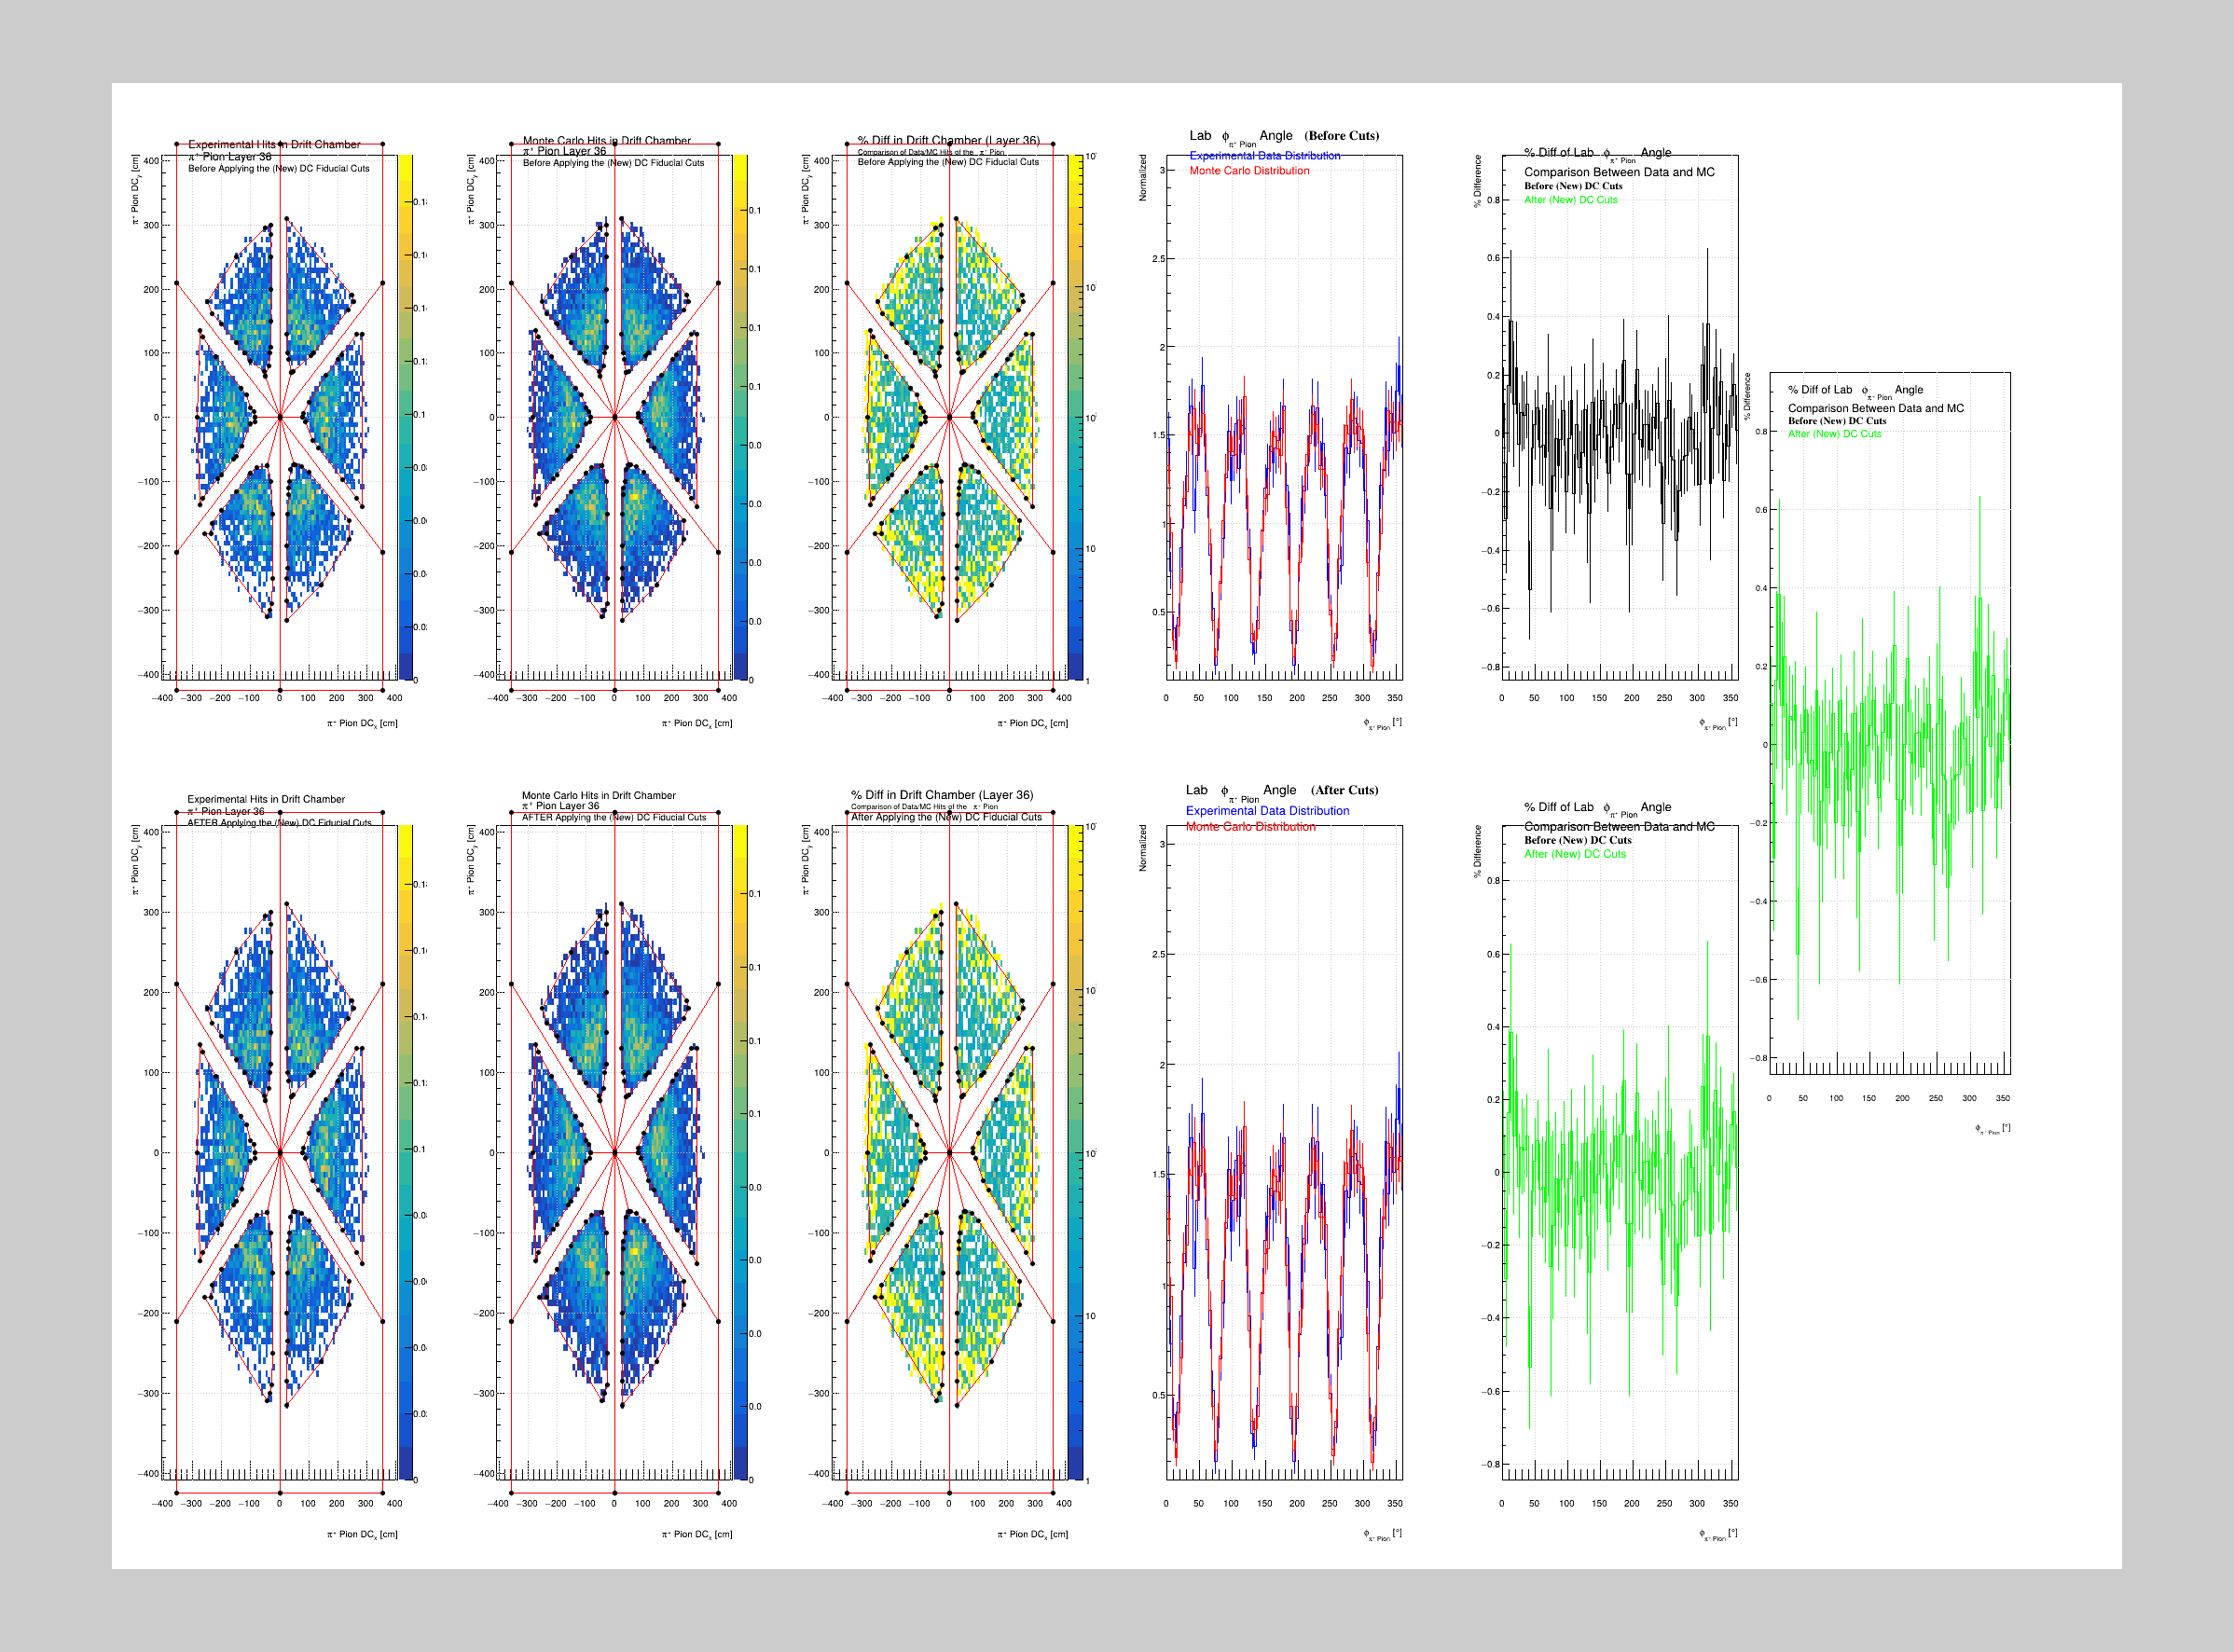

In [8]:
if(True):
    ROOT.gStyle.SetTitleOffset(1.5,'y')
    # ROOT.gStyle.SetTitleOffset(-1.5)
    ROOT.gStyle.SetTitleOffset(1.2,'x')
    def Ratio_of_2D_Histos(out_hist, rdf_hist, mdf_hist):
        for x_bin in range(0,      out_hist.GetNbinsX() + 1):
            for y_bin in range(0,  out_hist.GetNbinsY() + 1):
                Histo_rdf_value  = rdf_hist.GetBinContent(x_bin, y_bin)
                Histo_mdf_value  = mdf_hist.GetBinContent(x_bin, y_bin)
                # Histo_rdf_value  = round(Histo_rdf_value, 10)
                # Histo_mdf_value  = round(Histo_mdf_value, 10)
                if(Histo_rdf_value == 0):
                    percent_diff = 10000 if(Histo_mdf_value != 0) else 0
                else:
                    percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
                if(percent_diff   < 20):
                    percent_diff  = 0
                out_hist.SetBinContent(x_bin, y_bin, percent_diff)
        return out_hist

    def Normalize_Histogram(histogram):
        integral = histogram.Integral()
        # Check if the integral is non-zero to avoid division by zero
        if(integral != 0):
            # histogram.Scale(1.0 / integral)
            histogram.Scale(100 / integral)
        return histogram

    def is_point_in_polygon(x, y, polygon):
        def angle(x1, y1, x2, y2):
            return math.atan2(y2 - y1, x2 - x1)
        winding_number = 0
        num_vertices = len(polygon)
        for i in range(num_vertices):
            x1, y1 = polygon[i]
            x2, y2 = polygon[(i + 1) % num_vertices]
            a1 = angle(x, y, x1, y1)
            a2 = angle(x, y, x2, y2)
            angle_diff = a2 - a1
            if(angle_diff > math.pi):
                angle_diff -= 2 * math.pi
            elif(angle_diff < -math.pi):
                angle_diff += 2 * math.pi
            winding_number += angle_diff
        return abs(winding_number) > math.pi

    def apply_cut_on_boxes_3D(histogram, box_borders):
        for binz in range(0, histogram.GetNbinsZ() + 2):
            for biny in range(0, histogram.GetNbinsY() + 2):
                DCy = histogram.GetZaxis().GetBinCenter(binz)
                DCx = histogram.GetYaxis().GetBinCenter(biny)
                # Perform the cut check based only on DCx and DCy
                if(not (any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders))):
                # if((any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders))):
                    for binx in range(0, histogram.GetNbinsX() + 2):
                        # angle = histogram.GetXaxis().GetBinCenter(binx)
                        histogram.SetBinContent(binx, biny, binz, 0)  # Set bin content to zero
        return histogram

    def set_common_yaxis_range(hist1, hist2, hist3="N/A", hist4="N/A"):
        # Initialize variables for global min and max
        global_min = float('inf')
        global_max = float('-inf')
        # Loop over the bins of the first histogram
        for bin_ii in range(1, hist1.GetNbinsX() + 1):
            content = hist1.GetBinContent(bin_ii)
            error   = hist1.GetBinError(bin_ii)
            # Update global min/max with content ± error
            global_min = min(global_min, content - error)
            global_max = max(global_max, content + error)
        # Loop over the bins of the second histogram
        for bin_ii in range(1, hist2.GetNbinsX() + 1):
            content = hist2.GetBinContent(bin_ii)
            error   = hist2.GetBinError(bin_ii)
            # Update global min/max with content ± error
            global_min = min(global_min, content - error)
            global_max = max(global_max, content + error)
        if(hist3 not in ["N/A"]):
            for bin_ii in range(1, hist3.GetNbinsX() + 1):
                content = hist3.GetBinContent(bin_ii)
                error   = hist3.GetBinError(bin_ii)
                # Update global min/max with content ± error
                global_min = min(global_min, content - error)
                global_max = max(global_max, content + error)
        if(hist4 not in ["N/A"]):
            for bin_ii in range(1, hist4.GetNbinsX() + 1):
                content = hist4.GetBinContent(bin_ii)
                error   = hist4.GetBinError(bin_ii)
                # Update global min/max with content ± error
                global_min = min(global_min, content - error)
                global_max = max(global_max, content + error)
        global_min = 1.2*global_min if(global_min < 0) else 0.8*global_min
        global_max = 1.5*global_max if(global_max > 0) else 0.8*global_max

        # Set the y-axis range for both histograms to the common range
        hist1.GetYaxis().SetRangeUser(global_min, global_max)
        hist2.GetYaxis().SetRangeUser(global_min, global_max)
        if(hist3 not in ["N/A"]):
            hist3.GetYaxis().SetRangeUser(global_min, global_max)
        if(hist4 not in ["N/A"]):
            hist4.GetYaxis().SetRangeUser(global_min, global_max)

    canvas, histograms, pl = {}, {}, {}
    ROOT.gStyle.SetOptStat("i")

    DC_2D_Bin_Nums = 100
    
    Phi___Bin_Nums =  90
    Phi___MaxRange = 360
    Theta_Bin_Nums =  60
    Theta_MaxRange =  60

    polygon = {}

    Particle = "pip"
    Particle_Title = "#pi^{+} Pion" if(Particle in ["pip"]) else "Electron"
    DC_Layer = 36

    particle_angle = "pipPhi"

    Angle_Bin_Nums = Phi___Bin_Nums if("th" not in particle_angle) else Theta_Bin_Nums
    Angle_MaxRange = Phi___MaxRange if("th" not in particle_angle) else Theta_MaxRange
    
    Particle_Title = "#pi^{+} Pion" if(Particle in ["pip"]) else "Electron"
    particle_angle_Title = "".join(["#phi" if("Phi" in particle_angle) else "#theta", "_{", "#pi^{+} Pion" if("pip" in particle_angle) else "Electron", "}"])
    Sector = "All"
    # Sector = 5
    if(Particle not in ["pip"]):
        x_axis_DC_min, x_axis_DC_max         = -200, 200
        y_axis_DC_min, y_axis_DC_max         = -100 - (50*int((DC_Layer/6)/3)), 100 + (50*int((DC_Layer/6)/3))
    else:
        if(DC_Layer in [6]):
            x_axis_DC_min, x_axis_DC_max     = -150, 150
            y_axis_DC_min, y_axis_DC_max     = -175, 175
            if(Sector == 1):
                x_axis_DC_min, x_axis_DC_max =    0, 150
                y_axis_DC_min, y_axis_DC_max = -100, 100
            if(Sector == 2):
                x_axis_DC_min, x_axis_DC_max = -50,  150
                y_axis_DC_min, y_axis_DC_max =   0,  150
            if(Sector == 3):
                x_axis_DC_min, x_axis_DC_max = -150,  50
                y_axis_DC_min, y_axis_DC_max =    0, 150
            if(Sector == 4):
                x_axis_DC_min, x_axis_DC_max = -150,   0
                y_axis_DC_min, y_axis_DC_max = -100, 100
            if(Sector == 5):
                x_axis_DC_min, x_axis_DC_max = -150,  50
                y_axis_DC_min, y_axis_DC_max = -160,   0
            if(Sector == 6):
                x_axis_DC_min, x_axis_DC_max =  -50, 150
                y_axis_DC_min, y_axis_DC_max = -150,   0
        if(DC_Layer in [18]):
            x_axis_DC_min, x_axis_DC_max     = -300, 300
            y_axis_DC_min, y_axis_DC_max     = -300, 300
            if(Sector in [1]):
                x_axis_DC_min, x_axis_DC_max = -5,   300
                y_axis_DC_min, y_axis_DC_max = -200, 200
            if(Sector in [2]):
                x_axis_DC_min, x_axis_DC_max = -5,   300
                y_axis_DC_min, y_axis_DC_max = -5,   300
            if(Sector in [3]):
                x_axis_DC_min, x_axis_DC_max = -300,   5
                y_axis_DC_min, y_axis_DC_max = -5,   300
            if(Sector in [4]):
                x_axis_DC_min, x_axis_DC_max = -300,   5
                y_axis_DC_min, y_axis_DC_max = -200, 200
            if(Sector in [5]):
                x_axis_DC_min, x_axis_DC_max = -250,   5
                y_axis_DC_min, y_axis_DC_max = -250,   5
            if(Sector in [6]):
                x_axis_DC_min, x_axis_DC_max = -5,   225
                y_axis_DC_min, y_axis_DC_max = -225,   5
        if(DC_Layer in [36]):
            x_axis_DC_min, x_axis_DC_max     = -500, 500
            y_axis_DC_min, y_axis_DC_max     = -500, 500
            if(Sector in [1]):
                x_axis_DC_min, x_axis_DC_max = -5,   500
                y_axis_DC_min, y_axis_DC_max = -200, 200
            if(Sector in [2]):
                x_axis_DC_min, x_axis_DC_max = -5,   500
                y_axis_DC_min, y_axis_DC_max = -5,   500
            if(Sector in [3]):
                x_axis_DC_min, x_axis_DC_max = -500,   5
                y_axis_DC_min, y_axis_DC_max = -5,   500
            if(Sector in [4]):
                x_axis_DC_min, x_axis_DC_max = -500,   5
                y_axis_DC_min, y_axis_DC_max = -200, 200
            if(Sector in [5]):
                x_axis_DC_min, x_axis_DC_max = -500,   5
                y_axis_DC_min, y_axis_DC_max = -500,   5
            if(Sector in [6]):
                x_axis_DC_min, x_axis_DC_max = -5,   500
                y_axis_DC_min, y_axis_DC_max = -500,   5
    
    
    histo_name_rdf = f"RDF_{Particle}_DC_Layer_{DC_Layer}_Main_{particle_angle}"
    histo_name_mdf = f"MDF_{Particle}_DC_Layer_{DC_Layer}_Main_{particle_angle}"
    print(f"{color.BOLD}\nCreating Histograms for histo_name_rdf = {color.UNDERLINE}{histo_name_rdf}{color.END}\n")
    
    
    histograms[f"{histo_name_rdf}____Drift_Chamber"] = rdf_cut.Histo2D((f"{histo_name_rdf}____Drift_Chamber", f"#splitline{{#splitline{{#scale[2.25]{{Experimental Hits in Drift Chamber}}}}{{#scale[2.25]{{{Particle_Title} Layer {DC_Layer}}}}}}}{{#scale[2]{{Before Applying the (New) DC Fiducial Cuts}}}}; {Particle_Title} DC_{{x}} [cm]; {Particle_Title} DC_{{y}} [cm]", DC_2D_Bin_Nums, -400, 400, DC_2D_Bin_Nums, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
    histograms[f"{histo_name_mdf}____Drift_Chamber"] = mdf_cut.Histo2D((f"{histo_name_mdf}____Drift_Chamber", f"#splitline{{#splitline{{#scale[2.25]{{Monte Carlo Hits in Drift Chamber}}}}{{#scale[2.25]{{{Particle_Title} Layer {DC_Layer}}}}}}}{{#scale[2]{{Before Applying the (New) DC Fiducial Cuts}}}}; {Particle_Title} DC_{{x}} [cm]; {Particle_Title} DC_{{y}} [cm]",  DC_2D_Bin_Nums, -400, 400, DC_2D_Bin_Nums, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
    histograms[f"{histo_name_rdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
    histograms[f"{histo_name_rdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    histograms[f"{histo_name_mdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
    histograms[f"{histo_name_mdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    
    histograms[f"{histo_name_rdf}_{particle_angle}"] = rdf_cut.Histo1D((f"{histo_name_rdf}_{particle_angle}", "rdf (angle) Title", Angle_Bin_Nums, 0, Angle_MaxRange), str(particle_angle))
    histograms[f"{histo_name_rdf}_{particle_angle}"] = histograms[f"{histo_name_rdf}_{particle_angle}"].GetValue()
    histograms[f"{histo_name_rdf}_{particle_angle}"].SetLineColor(ROOT.kBlue)
    histograms[f"{histo_name_mdf}_{particle_angle}"] = mdf_cut.Histo1D((f"{histo_name_mdf}_{particle_angle}", "mdf (angle) Title", Angle_Bin_Nums, 0, Angle_MaxRange), str(particle_angle))
    histograms[f"{histo_name_mdf}_{particle_angle}"] = histograms[f"{histo_name_mdf}_{particle_angle}"].GetValue()
    histograms[f"{histo_name_mdf}_{particle_angle}"].SetLineColor(ROOT.kRed)
    
    Normalize_Histogram(histograms[f"{histo_name_rdf}____Drift_Chamber"])
    Normalize_Histogram(histograms[f"{histo_name_rdf}_{particle_angle}"])
    Normalize_Histogram(histograms[f"{histo_name_mdf}____Drift_Chamber"])
    Normalize_Histogram(histograms[f"{histo_name_mdf}_{particle_angle}"])
    
    histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = histograms[f"{histo_name_rdf}____Drift_Chamber"].Clone(f"{histo_name_rdf}____Drift_Chamber_ratio")
    histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = Ratio_of_2D_Histos(out_hist=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"], rdf_hist=histograms[f"{histo_name_rdf}____Drift_Chamber"], mdf_hist=histograms[f"{histo_name_mdf}____Drift_Chamber"])
    
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"] = histograms[f"{histo_name_rdf}_{particle_angle}"].Clone(f"{histo_name_rdf}_{particle_angle}_ratio")
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Add(histograms[f"{histo_name_mdf}_{particle_angle}"], -1)
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Divide(histograms[f"{histo_name_rdf}_{particle_angle}"])
    
    
    histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"] = rdf_cut_2.Histo2D((f"{histo_name_rdf}_After_Cut____Drift_Chamber", f"#splitline{{#splitline{{#scale[2.25]{{Experimental Hits in Drift Chamber}}}}{{#scale[2.25]{{{Particle_Title} Layer {DC_Layer}}}}}}}{{#scale[2]{{AFTER Applying the (New) DC Fiducial Cuts}}}}; {Particle_Title} DC_{{x}} [cm]; {Particle_Title} DC_{{y}} [cm]", DC_2D_Bin_Nums, -400, 400, DC_2D_Bin_Nums, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
    histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"] = mdf_cut_2.Histo2D((f"{histo_name_mdf}_After_Cut____Drift_Chamber", f"#splitline{{#splitline{{#scale[2.25]{{Monte Carlo Hits in Drift Chamber}}}}{{#scale[2.25]{{{Particle_Title} Layer {DC_Layer}}}}}}}{{#scale[2]{{AFTER Applying the (New) DC Fiducial Cuts}}}}; {Particle_Title} DC_{{x}} [cm]; {Particle_Title} DC_{{y}} [cm]",  DC_2D_Bin_Nums, -400, 400, DC_2D_Bin_Nums, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
    histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
    histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
    histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"] = rdf_cut_2.Histo1D((f"{histo_name_rdf}_After_Cut_{particle_angle}", "rdf (angle) Title - AFTER CUTS", Angle_Bin_Nums, 0, Angle_MaxRange), str(particle_angle))
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"] = histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].GetValue()
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].SetLineColor(ROOT.kBlue)
    histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"] = mdf_cut_2.Histo1D((f"{histo_name_mdf}_After_Cut_{particle_angle}", "mdf (angle) Title - AFTER CUTS", Angle_Bin_Nums, 0, Angle_MaxRange), str(particle_angle))
    histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"] = histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].GetValue()
    histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].SetLineColor(ROOT.kRed)
    
    Normalize_Histogram(histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"])
    Normalize_Histogram(histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"])
    Normalize_Histogram(histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"])
    Normalize_Histogram(histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"])
    
    histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"] = histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].Clone(f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio")
    histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"] = Ratio_of_2D_Histos(out_hist=histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"], rdf_hist=histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"], mdf_hist=histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"])
    
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"] = histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].Clone(f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio")
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Add(histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"], -1)
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Divide(histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"])
    
    
    print("\nCreating TCanvas...\n")
    
    canvas[histo_name_rdf] = Canvas_Create(Name=f"canvas_{histo_name_rdf}", Num_Columns=1, Num_Rows=3, Size_X=2400, Size_Y=1800, cd_Space=0)
    canvas[histo_name_rdf].SetFillColor(17)  # Color index 17 corresponds to a light grey color
    
    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"] = canvas[histo_name_rdf].cd(1)
    canvas[f"{histo_name_rdf}_cd_After__New_Cuts"] = canvas[histo_name_rdf].cd(2)
    canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"] = canvas[histo_name_rdf].cd(3)
    
    Plot_All_Q = not False
    
    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].SetPad(0.05, 0.545, 0.95, 0.95)
    canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].SetPad(0.05, 0.05,  0.95, 0.555)
    canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"].SetPad(0.78 if(Plot_All_Q) else 0.71, 0.3, 0.9, 0.8)
    
    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)
    canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)
    
    set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
    # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_{particle_angle}_ratio"])
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetLineColor(ROOT.kBlack)
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetLineColor(ROOT.kGreen)
    
    set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
    # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_{particle_angle}_ratio"])
    set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"], histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"])
    # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"], histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"])
    
    histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{Before Applying the (New) DC Fiducial Cuts}}}}")
    histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{After Applying the (New) DC Fiducial Cuts}}}}")
    
    histograms[f"{histo_name_rdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
    histograms[f"{histo_name_mdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
    
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
    histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
    
    histograms[f"{histo_name_rdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
    histograms[f"{histo_name_mdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")
    histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")
    
    histograms[f"{histo_name_rdf}_{particle_angle}"].GetXaxis().SetTitle(f"{particle_angle_Title} [#circ]")
    histograms[f"{histo_name_mdf}_{particle_angle}"].GetXaxis().SetTitle(f"{particle_angle_Title} [#circ]")
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].GetXaxis().SetTitle(f"{particle_angle_Title} [#circ]")
    histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].GetXaxis().SetTitle(f"{particle_angle_Title} [#circ]")
    
    
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")
    
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")
    
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].GetXaxis().SetTitle(f"{particle_angle_Title} [#circ]")
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].GetXaxis().SetTitle(f"{particle_angle_Title} [#circ]")
    
    if(Plot_All_Q):
        canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(1)
        histograms[f"{histo_name_rdf}____Drift_Chamber"].Draw("colz")
        ROOT.gPad.SetLogz(0)
        canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(2)
        histograms[f"{histo_name_mdf}____Drift_Chamber"].Draw("colz")
        ROOT.gPad.SetLogz(0)
    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(3 if(Plot_All_Q) else 1)
    histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
    ROOT.gPad.SetLogz(1)
    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(4 if(Plot_All_Q) else 2)
    histograms[f"{histo_name_rdf}_{particle_angle}"].Draw("hist EO same")
    histograms[f"{histo_name_mdf}_{particle_angle}"].Draw("hist EO same")
    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(5 if(Plot_All_Q) else 3)
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")
    
    if(Plot_All_Q):
        canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(1)
        histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].Draw("colz")
        ROOT.gPad.SetLogz(0)
        canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(2)
        histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].Draw("colz")
        ROOT.gPad.SetLogz(0)
    canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(3 if(Plot_All_Q) else 1)
    histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
    ROOT.gPad.SetLogz(1)
    canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(4 if(Plot_All_Q) else 2)
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
    histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
    canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(5 if(Plot_All_Q) else 3)
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")
    
    canvas[histo_name_rdf].cd(3)
    canvas[histo_name_rdf].cd(3).SetTopMargin(0.05)
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")
    histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")
    
    canvas[histo_name_rdf].Update()
    
    CD_NUM_List = [1, 2, 3] if(Plot_All_Q) else [1]
    list_of_lines = []
    list_of_lines.append(polygon_all["".join(["Layer_", str(DC_Layer), "_", "" if (DC_Layer not in [6]) else "_", str(Particle)])])
    for CD_NUM in CD_NUM_List:
        try:
            # for ii, polygon_ii in enumerate(list_of_lines):
            #     n_points = len(polygon_ii)
            #     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"] = ROOT.TPolyLine(n_points + 1)
            #     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"] = ROOT.TPolyLine(n_points + 1)
            #     for i, (x, y) in enumerate(polygon_ii):
            #         pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(i, x, y)
            #         pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(i, x, y)
            #     # Close the shape by repeating the first point
            #     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
            #     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineColor(2)  # Red color
            #     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineWidth(1)
            #     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
            #     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineColor(2)  # Red color
            #     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineWidth(1)
            #     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(CD_NUM)
            #     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].Draw("same")
            #     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(CD_NUM)
            #     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].Draw("same")
            for ii, polygon_ii in enumerate(list_of_lines):
                n_points = len(polygon_ii)
                pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"] = ROOT.TPolyLine(n_points + 1)
                pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"] = ROOT.TPolyLine(n_points + 1)
                for i, (x, y) in enumerate(polygon_ii):
                    pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(i, x, y)
                    pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(i, x, y)
                    # Add a marker at each point along the line for "Before"
                    pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_BeforeM_{i}"] = ROOT.TMarker(x, y, 20)  # Marker at each point
                    pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_BeforeM_{i}"].SetMarkerColor(ROOT.kBlack)
                    pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_BeforeM_{i}"].SetMarkerSize(1.5)
                    # Add a marker at each point along the line for "After"
                    pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__AfterM_{i}"] = ROOT.TMarker(x, y, 20)  # Marker at each point
                    pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__AfterM_{i}"].SetMarkerColor(ROOT.kBlack)
                    pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__AfterM_{i}"].SetMarkerSize(1.5)
                # Close the shape by repeating the first point
                pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
                pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineColor(2)  # Red color
                pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineWidth(1)
                pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
                pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineColor(2)  # Red color
                pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineWidth(1)
                # Draw the lines and markers on the canvases
                canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(CD_NUM)
                pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].Draw("same")
                for i in range(n_points):
                    pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_BeforeM_{i}"].Draw("same")  # Draw each marker for "Before"
                canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(CD_NUM)
                pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].Draw("same")
                for i in range(n_points):
                    pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__AfterM_{i}"].Draw("same")  # Draw each marker for "After"
            canvas[histo_name_rdf].Update()
        except:
            print("ERROR in box.Draw('same')")
            print(f"{color.Error}TRACEBACK:\n{color.END_B}{str(traceback.format_exc())}{color.END}")
    
    print("\nDrawing TCanvas...\n")
    
    canvas[histo_name_rdf].Draw()
    canvas[histo_name_rdf].Update()
    print("\n\nDone")
else:
    print("Cell not set to run...")

In [9]:
stop

NameError: name 'stop' is not defined

In [ ]:
for ii in canvas:
    print(ii)

In [ ]:
canvas["RDF_pip_DC_Layer_6_Main"].Draw()


In [ ]:
C...As an example, consider a main program of the form
C...Double precision and integer declarations.
*======================================================================
      program pythiaeic

      include 'pythia-radcorr/pythia.inc'              ! All PYTHIA commons blocks
      include "pythia-radcorr/mc_set.inc"
      include "pythia-radcorr/py6strf.inc"
      include "pythia-radcorr/mcRadCor.inc"
      include "pythia-radcorr/radgen.inc"
      include "pythia-radcorr/phiout.inc"

C...Added by liang 1/6/12
C...Switches for nuclear correction
      COMMON/PYNUCL/INUMOD,CHANUM,ORDER
      SAVE /PYNUCL/
      DOUBLE PRECISION INUMOD,CHANUM
      INTEGER ORDER

      integer NEV, NPRT, ievent, genevent, I, tracknr, ltype 
      integer lastgenevent, idum1, idum2, initseed, nrtrack
      REAL trueX, trueW2, trueNu
      DOUBLE PRECISION sqrts, radgamE, radgamp, radgamEnucl
      DOUBLE PRECISION pbeamE, pbeta, pgamma, ebeamE, epznucl
      CHARACTER PARAM*100
      LOGICAL UseLut, GenLut

c ---------------------------------------------------------------------
c     Run parameter
c ---------------------------------------------------------------------
      integer*4 today(3), now(3)
c---------------------------------------------------------------------
c     ASCII output file
c ---------------------------------------------------------------------
      integer asciiLun
      parameter (asciiLun=29)
      CHARACTER*256 outputfilename
      CHARACTER*256 outname

c---------------------------------------------------------------------
C...Function used for random seed generation
c---------------------------------------------------------------------
      integer get_random_seed

c---------------------------------------------------------------------
! ... force block data modules to be read
C       external pydata
c ---------------------------------------------------------------------

       iModel=0
       pbeam=100. 
       ebeam=5.0 
       ltype=11
       masse=PYMASS(11)
       massp=PYMASS(2212)
       ievent=0
       genevent=0
       lastgenevent=0
       tracknr=0

C...Read output file name
       READ(*,*) outname
C...Read lepton beam type 
       READ(*,*) ltype 
C...Read parameters for PYINIT call (beam and target particle energy).
       READ(*,*) pbeam, ebeam
C...Read number of events to generate, and to print.
       READ(*,*) NEV,NPRT
C...Read min/max x of radgen lookup table
       READ(*,*) mcSet_XMin, mcSet_XMax
C...Read min/max y of generation range      
       READ(*,*) mcSet_YMin, mcSet_YMax
C...Read min/max Q2 of generation range      
       READ(*,*) mcSet_Q2Min, mcSet_Q2Max
C...Read information for cross section used in radgen
       READ(*,*) genSet_FStruct, genSet_R
C...Read parameters of radcorr: do radcorr (1), generate look-up table (2)
       READ(*,*) qedrad
C...Read parameters for PYTHIA-Model = which generation is done     
       READ(*,*) iModel
C...Read target type mass and charge
       READ(*,*) mcSet_TarA, mcSet_TarZ
C...Read nuclear pdf parameter mass number A, charge number Z
       READ(*,*) INUMOD, CHANUM
C...Read nuclear pdf correction order
       READ(*,*) ORDER
C...Read information for cross section used in radgen
  100  READ(*,'(A)',END=200) PARAM
       CALL PYGIVE(PARAM)
       GOTO 100
c ---------------------------------------------------------------------
C...Initialize PYTHIA.      
c ---------------------------------------------------------------------
  200  write(*,*) '*********************************************'
       write(*,*) 'NOW all parameters are read by PYTHIA'
       write(*,*) '*********************************************'
C       call PYLIST(11)
C       call PYLIST(12)

C     Getting the date and time of the event generation
        
      call idate(today)   ! today(1)=day, (2)=month, (3)=year
      call itime(now)     ! now(1)=hour, (2)=minute, (3)=second
        
!     Take date as the SEED for the random number generation
       
      initseed = get_random_seed()
      write(6,*) 'SEED = ', initseed
      call rndmq (idum1,idum2,initseed,' ')
        
C     proton is defined in positive z and as target
      P(2,1)=0.0  
      P(2,2)=0.0  
      P(2,3)=pbeam
C     lepton is defined in negative z and as beam
      P(1,1)=0.0  
      P(1,2)=0.0  
      P(1,3)=-ebeam

      if (mcSet_TarZ.eq.0) then
        massp=PYMASS(2112)
      else
        massp=PYMASS(2212)
      endif
      masse=PYMASS(ltype)

      pbeamE=sqrt(pbeam**2+massp**2)
      pbeta=pbeam/pbeamE
      pgamma=pbeamE/massp
      ebeamE=sqrt(ebeam**2+masse**2)
      ebeamEnucl=pgamma*ebeamE-pgamma*pbeta*(-ebeam)
      epznucl=-pgamma*pbeta*(ebeamE)+pgamma*(-ebeam)
      write(*,*) ebeamEnucl, ebeamE, epznucl, -ebeam
      mcSet_EneBeam=sngl(ebeamEnucl)

      sqrts=sqrt(2.*pbeam*ebeam+2.*pbeamE*ebeamE+massp**2+masse**2)
      write(*,*) '*********************************************'
      write(*,*) 'proton beam momentum:', pbeam, 'GeV'
      write(*,*) 'lepton beam momentum:', ebeam, 'GeV'
      write(*,*) 'resulting sqrt(s):', sqrts, 'GeV'
      write(*,*) '*********************************************'

       if (iModel.eq.0) then
           UseLUT=.false.
           GenLUT=.false.
           qedrad=0
           MSTP(199)=0
           mcRadCor_EBrems=0.
       elseif (iModel.eq.1) then
         if (qedrad.eq.0) then
             mcRadCor_EBrems=0.
             UseLUT=.false.
             GenLUT=.false.
             MSTP(199)=1
         elseif (qedrad.eq.1) then
             mcRadCor_EBrems=0.
             UseLUT=.true.
             GenLUT=.false.
             MSTP(199)=1
             call radgen_init(UseLUT,GenLUT)
             write(*,*) 'I have initialized radgen'
         elseif (qedrad.eq.2) then
             write(*,*) 'radgen lookup table will be generated'
             mcRadCor_EBrems=0.
             UseLUT=.true.
             GenLUT=.true.
             MSTP(199)=1
             call radgen_init(UseLUT,GenLUT)
             goto 500
         endif
       endif

C     Initilization for collider mode
       if ((mcSet_TarZ.ge.1).and.(ltype.eq.11)) then
          call pyinit ('3MOM','gamma/e-','p+',WIN)
       elseif ((mcSet_TarZ.ge.1).and.(ltype.eq.-11)) then
          call pyinit ('3MOM','gamma/e+','p+',WIN)
       elseif ((mcSet_TarZ.eq.0).and.(ltype.eq.-11)) then
          call pyinit ('3MOM','gamma/e+','n0',WIN)
       elseif ((mcSet_TarZ.eq.0).and.(ltype.eq.11)) then
          call pyinit ('3MOM','gamma/e-','n0',WIN)
       endif

C      If we ever want to simulate fixed target we need to change this
C      win=ebeam
C      call pyinit('fixt','gamma/e-','p+', WIN)

c ---------------------------------------------------------------------
c     Open ascii output file
c ---------------------------------------------------------------------
       outputfilename=outname
       open(asciiLun, file=outputfilename)
       write(*,*) 'the outputfile will be named: ', outname

c ---------------------------------------------------------------------
C...Event generation loop
c ---------------------------------------------------------------------

C   This is what we write in the ascii-file

        write(29,*)' PYTHIA EVENT FILE '
        write(29,*)'============================================'
        write(29,30) 
30      format('I, ievent, genevent, subprocess, nucleon,
     &  targetparton, xtargparton, beamparton, xbeamparton,
     &  thetabeamprtn, truey, trueQ2, truex, trueW2, trueNu, leptonphi, 
     &  s_hat, t_hat, u_hat, pt2_hat, Q2_hat, F2, F1, R, sigma_rad, 
     &  SigRadCor, EBrems, photonflux, t-diff, nrTracks')
        write(29,*)'============================================'

        write(29,*)' I  K(I,1)  K(I,2)  K(I,3)  K(I,4)  K(I,5)
     &  P(I,1)  P(I,2)  P(I,3)  P(I,4)  P(I,5)  V(I,1)  V(I,2)  V(I,3)'
        write(29,*)'============================================'

       DO 300 IEV=1,NEV
C         write(*,*) "event generated:", IEV
999      CALL PYEVNT
         if (MSTI(61).eq.1) then
            write(*,*) 'go back to PYEVNT call'
            goto 999
         endif
         IF (IEV.LE.NPRT) CALL PYLIST(2)

         ievent=IEV
         genevent=NGEN(0,3)-lastgenevent

       trueX =  VINT(307)/VINT(309)/(2.*pbeam*ebeam+2.*pbeamE*ebeamE)
       trueW2 = massp**2 + VINT(307)*(1/trueX-1)
       trueNu = (trueW2 + VINT(307) - massp**2)/(2.*massp)
      if (mcRadCor_EBrems.gt.0.) then
         radgamEnucl=sqrt(dplabg(1)**2+dplabg(2)**2+dplabg(3)**2)
         radgamE=pgamma*radgamEnucl-pgamma*pbeta*dplabg(3)
         radgamp=-pgamma*pbeta*radgamEnucl+pgamma*dplabg(3)
C         write(*,*) radgamEnucl, radgamE, dplabg(3), radgamp
      else
        radgamEnucl=0D0
        radgamE=0D0
        radgamp=0D0 
      endif

         tracknr=N
         if (mcRadCor_EBrems.gt.0.) then
            nrtrack=tracknr+1
         else
            nrtrack=tracknr
         endif

         if ((msti(1).ge.91).and.(msti(1).le.94)) msti(16)=0
           
         write(29,32) 0, ievent, genevent, msti(1), msti(12), 
     &        msti(16), pari(34), msti(15), pari(33), pari(53), 
     &        VINT(309), VINT(307), trueX, trueW2, trueNu,
     &        VINT(313), pari(14), pari(15), pari(16), 
     &        pari(18),  pari(22), sngl(py6f2), sngl(py6f1), 
     &        py6r, mcRadCor_Sigrad, mcRadCor_sigcor, radgamEnucl,
     &        VINT(319), VINT(45), nrtrack 
 32      format((I4,1x,$),(I10,1x,$),3(I4,1x,$),(I10,1x,$),f9.6,1x,$,
     &         I12,1x,$,
     &         2(f12.6,1x,$),7(f18.11,3x,$),12(f19.9,3x,$),I12,/)
         write(29,*)'============================================'

         DO I=1,tracknr
         if (K(I,3).le.nrtrack) then
         write(29,34) I,K(I,1),K(I,2),K(I,3),K(I,4),K(I,5),
     &        P(I,1),P(I,2),P(I,3),P(I,4),P(I,5),
     &        V(I,1),V(I,2),V(I,3)
         endif
         ENDDO
         if (mcRadCor_EBrems.gt.0.) then
            write(29,34) nrtrack, 55, 22, 1, 0, 0,
     &      sngl(dplabg(1)),sngl(dplabg(2)),sngl(-radgamp),
     &      sngl(radgamE), 0., 0., 0., 0.
         endif
 34      format(2(I6,1x,$),I10,1x,$,3(I8,1x,$),8(f15.6,1x,$),/)
         write(29,*)'=============== Event finished ==============='
         lastgenevent=NGEN(0,3)

  300  CONTINUE
      
C...Print cross sections.
       CALL PYSTAT(1)
       CALL PYSTAT(4)

       write(*,*)"The charm mass used is: ", PMAS(4,1)

C...Print the Pythia cross section which is needed to get an absolut 
C   normalisation the number is in microbarns
       write(*,*)'==================================================='
       write(*,*)'Pythia total cross section normalisation:',
     &            pari(1)*1000, ' microbarn'
       write(*,*)'Total Number of generated events', MSTI(5)
       write(*,*)'Total Number of trials', NGEN(0,3)
       write(*,*)'==================================================='
       close(29)

  500  if (qedrad.eq.2) then
         write(*,*) 'lookup table is generated;'
         write(*,*) 'to run now pythia change parameter qedrad to 1'
       endif

C...Check pdf status       
       call PDFSTA
       END

      ! ================================================================
      ! Return a kind=8 integer from the system clock.
      ! Use the system_clock() intrinsic function if possible.
      ! In case of failure there, manually construct a time in
      ! milliseconds using date_and_time().
      ! Returns 0 in case of any problems.
      ! ================================================================
      function query_clock()

         implicit none

         integer*8 query_clock

         integer date(8)

         ! Get processor clock using system_clock() intrinsic.
         ! Resultant value can be in milli-, micro- or nano-seconds
         ! depending on the platform and the compiler.
         ! Don't use an integer(kind=4) to avoid wraparound.
         call system_clock(query_clock)
         ! In case of no clock, or failure to query the clock,
         ! the value is set to -huge(). In this case, manually
         ! construct a time using date information.
         if (query_clock .eq. -huge(query_clock)) then
            ! date_and_time was introduced in the Fortran95 standard.
            ! date(1) to date(8) are, in order:
            ! year, month, day, time difference with UTC in minutes,
            ! hour, minutes, seconds, milliseconds.
            call date_and_time(values=date)
            ! Milliseconds since 1970
            query_clock =
     +         (date(1) - 1970) * 365_8 * 24 * 60 * 60 * 1000 +
     +          date(2) * 31_8 * 24 * 60 * 60 * 1000 +
     +          date(3) * 24 * 60 * 60  * 1000 +
     +          date(5) * 60 * 60 * 1000 +
     +          date(6) * 60 * 1000 +
     +          date(7) * 1000 +
     +          date(8)
         end if
         ! Requre clock to be positive, otherwise set
         ! an error value.
         if (query_clock .lt. 0) then
            query_clock = 0
         end if
      end function query_clock
      ! ================================================================


      ! ================================================================
      ! Returns an integer seed from an integer(kind=8) clock value.
      ! ================================================================
      function make_clock_seed(clock)

         implicit none

         integer make_clock_seed

         integer*8 clock
         integer temp(2)

         ! Print a warning if we got a zero clock value.
         if (clock .eq. 0) then
            write(*,*) 'Warning: making clock seed from clock value 0'
         end if
         ! Transfer clock bitwise representation to pair of integers
         temp = transfer(clock, temp)
         ! XOR the two components
         make_clock_seed = ieor(temp(1), temp(2))
         ! Additional XOR with current process ID, plus a prime!
         make_clock_seed = ieor(make_clock_seed, getpid() + 1099279)
      end function make_clock_seed
      ! ================================================================


      ! ================================================================
      ! Get a random number to seed the random number generator.
      ! Impementation based on
      ! http://gcc.gnu.org/onlinedocs/gfortran/RANDOM_005fSEED.html
      ! ================================================================
      function get_random_seed()

         implicit none

         integer get_random_seed

         integer io_status
         integer unit_number
         parameter (unit_number=123)
         ! Functions
         integer*8 query_clock
         integer make_clock_seed

         ! First we try to use the OS-provided random number if available
         open(unit=unit_number, file='/dev/urandom', access='stream',
     +        form='unformatted', action='read', status='old',
     +        iostat=io_status)
         ! If /dev/urandom was opened then read a number from it
         if (io_status == 0) then
            read(unit_number) get_random_seed
            close(unit_number)
         ! That didn't work, so make a seed from the clock and
         ! the process ID (in case we have simultaneous jobs)
         else
            get_random_seed = make_clock_seed(query_clock())
         end if
         if (get_random_seed .lt. 0) then
            get_random_seed = -get_random_seed
         end if
      end function get_random_seed
      ! ================================================================